In [1]:
## Lead Scoring Case Study

# Step 1: Importing Data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import io

In [4]:
#Importing Data Set
lead = pd.read_csv('Leads.csv')

In [5]:
lead.shape

(9240, 37)

In [6]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Inspecting the Dataframe

In [8]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
lead1 = lead

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

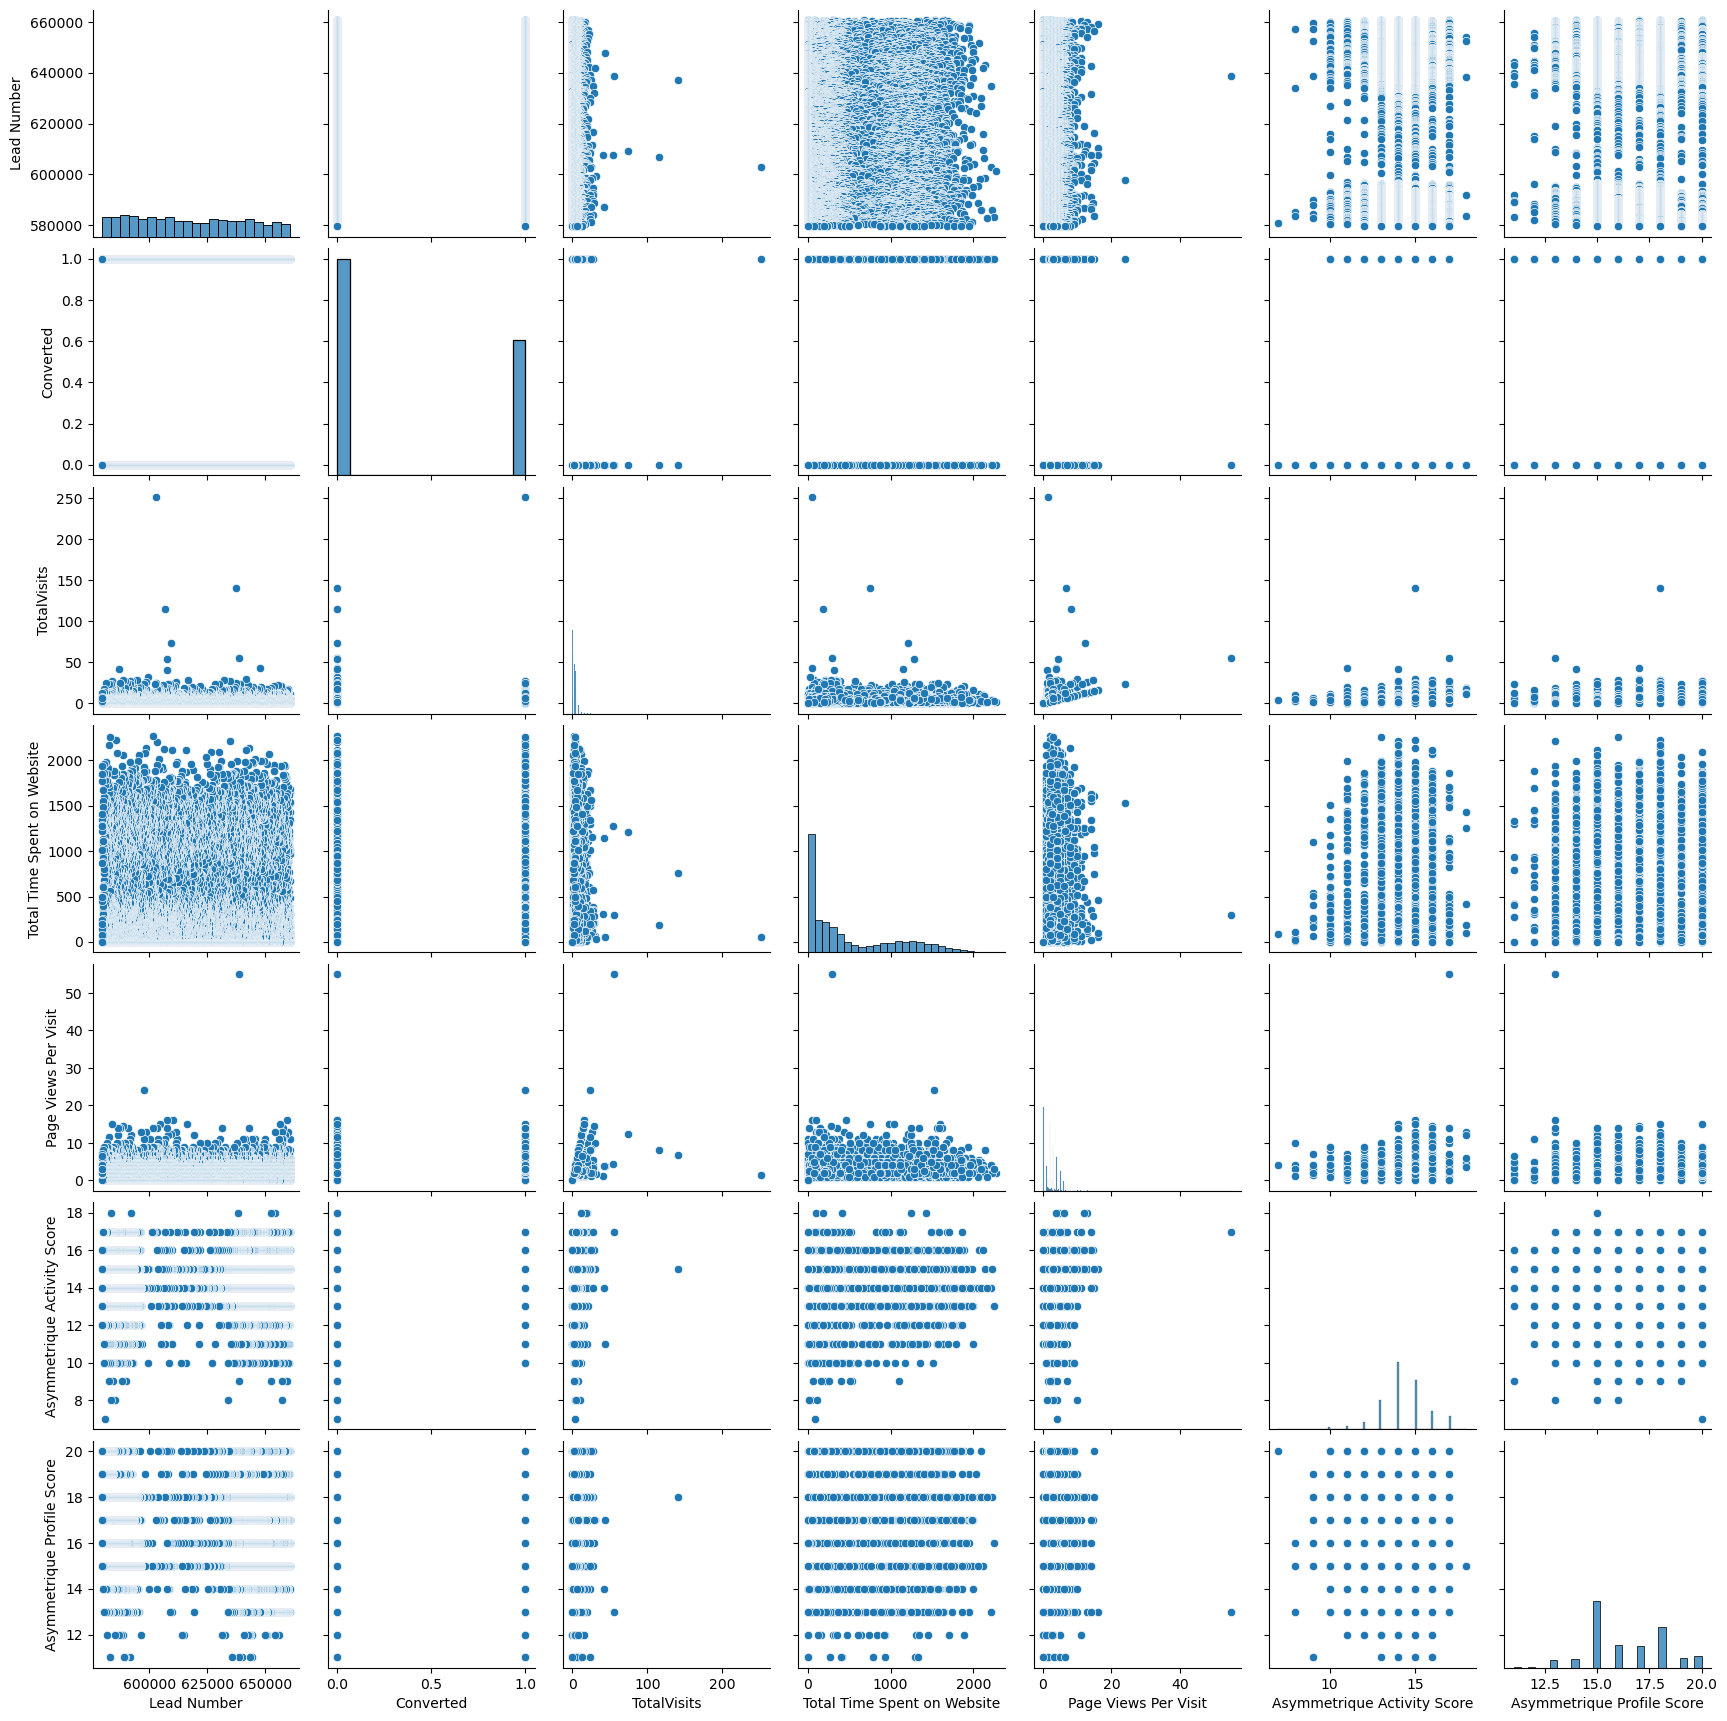

In [12]:
sns.pairplot(lead)
plt.show()

Drop Prospect ID column

In [13]:
lead1.drop(['Prospect ID'], axis = 1, inplace=True)

In [14]:
lead1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
lead1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

lead1['What matters most to you in choosing a course'] can also be dropped as most of the value is Better Career Prospects

In [16]:
lead1.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [17]:
lead1.shape

(9240, 35)

In [18]:
lead1['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

Also can drop 'Get updates on DM Content' as it is only 1 value across all rows

In [19]:
lead1.drop(['Get updates on DM Content'], axis=1, inplace=True)

In [20]:
lead1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [21]:
lead1['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Drop 'Do Not Call' column as the values are mostly No

In [22]:
lead1.drop(['Do Not Call'], axis=1, inplace=True)

In [23]:
lead1.tail()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Update me on Supply Chain Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,579533,Landing Page Submission,Direct Traffic,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [24]:
lead1['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

drop the above column as the values are mostly No

In [25]:
lead1.drop(['Update me on Supply Chain Content'],axis=1, inplace=True)

In [26]:
lead1.shape

(9240, 32)

In [27]:
lead1['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

drop the cheque column - as the value is mostly No

In [28]:
lead1.drop(['I agree to pay the amount through cheque'], axis=1, inplace=True)

In [29]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [30]:
lead1['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [31]:
lead1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          7802 non-null   obje

In [33]:
lead1.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [34]:
##Check the vlaues which are null
lead1.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Tags         

In [35]:
lead1.rename(columns = {'Asymmetrique Activity Index':'Asym_Activity_Index', 'Asymmetrique Profile Index':'Asym_Profile_Index'}, inplace=True)

In [36]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asym_Activity_Index', 'Asym_Profile_Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
#Rename columns
lead1.rename(columns = {'Asymmetrique Activity Score':'Asym_Activity_Score', 'Asymmetrique Profile Score':'Asym_Profile_Score'}, inplace=True)

In [38]:
lead1.rename(columns = {'Total Time Spent on Website':'Time_Spent_Website'}, inplace=True)

Draw a boxplot for Time_Spent_website to see the range of values

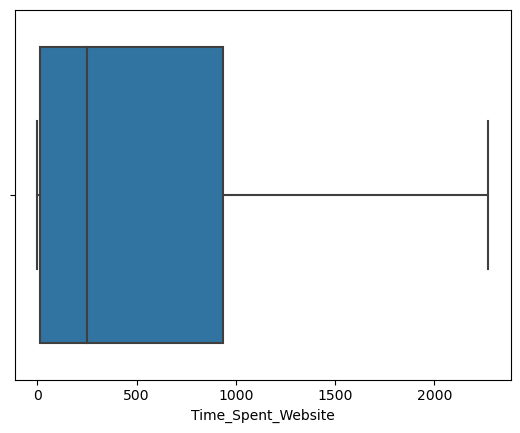

In [39]:
sns.boxplot(lead1.Time_Spent_Website)
plt.show()

In [40]:
lead1.Time_Spent_Website.describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Time_Spent_Website, dtype: float64

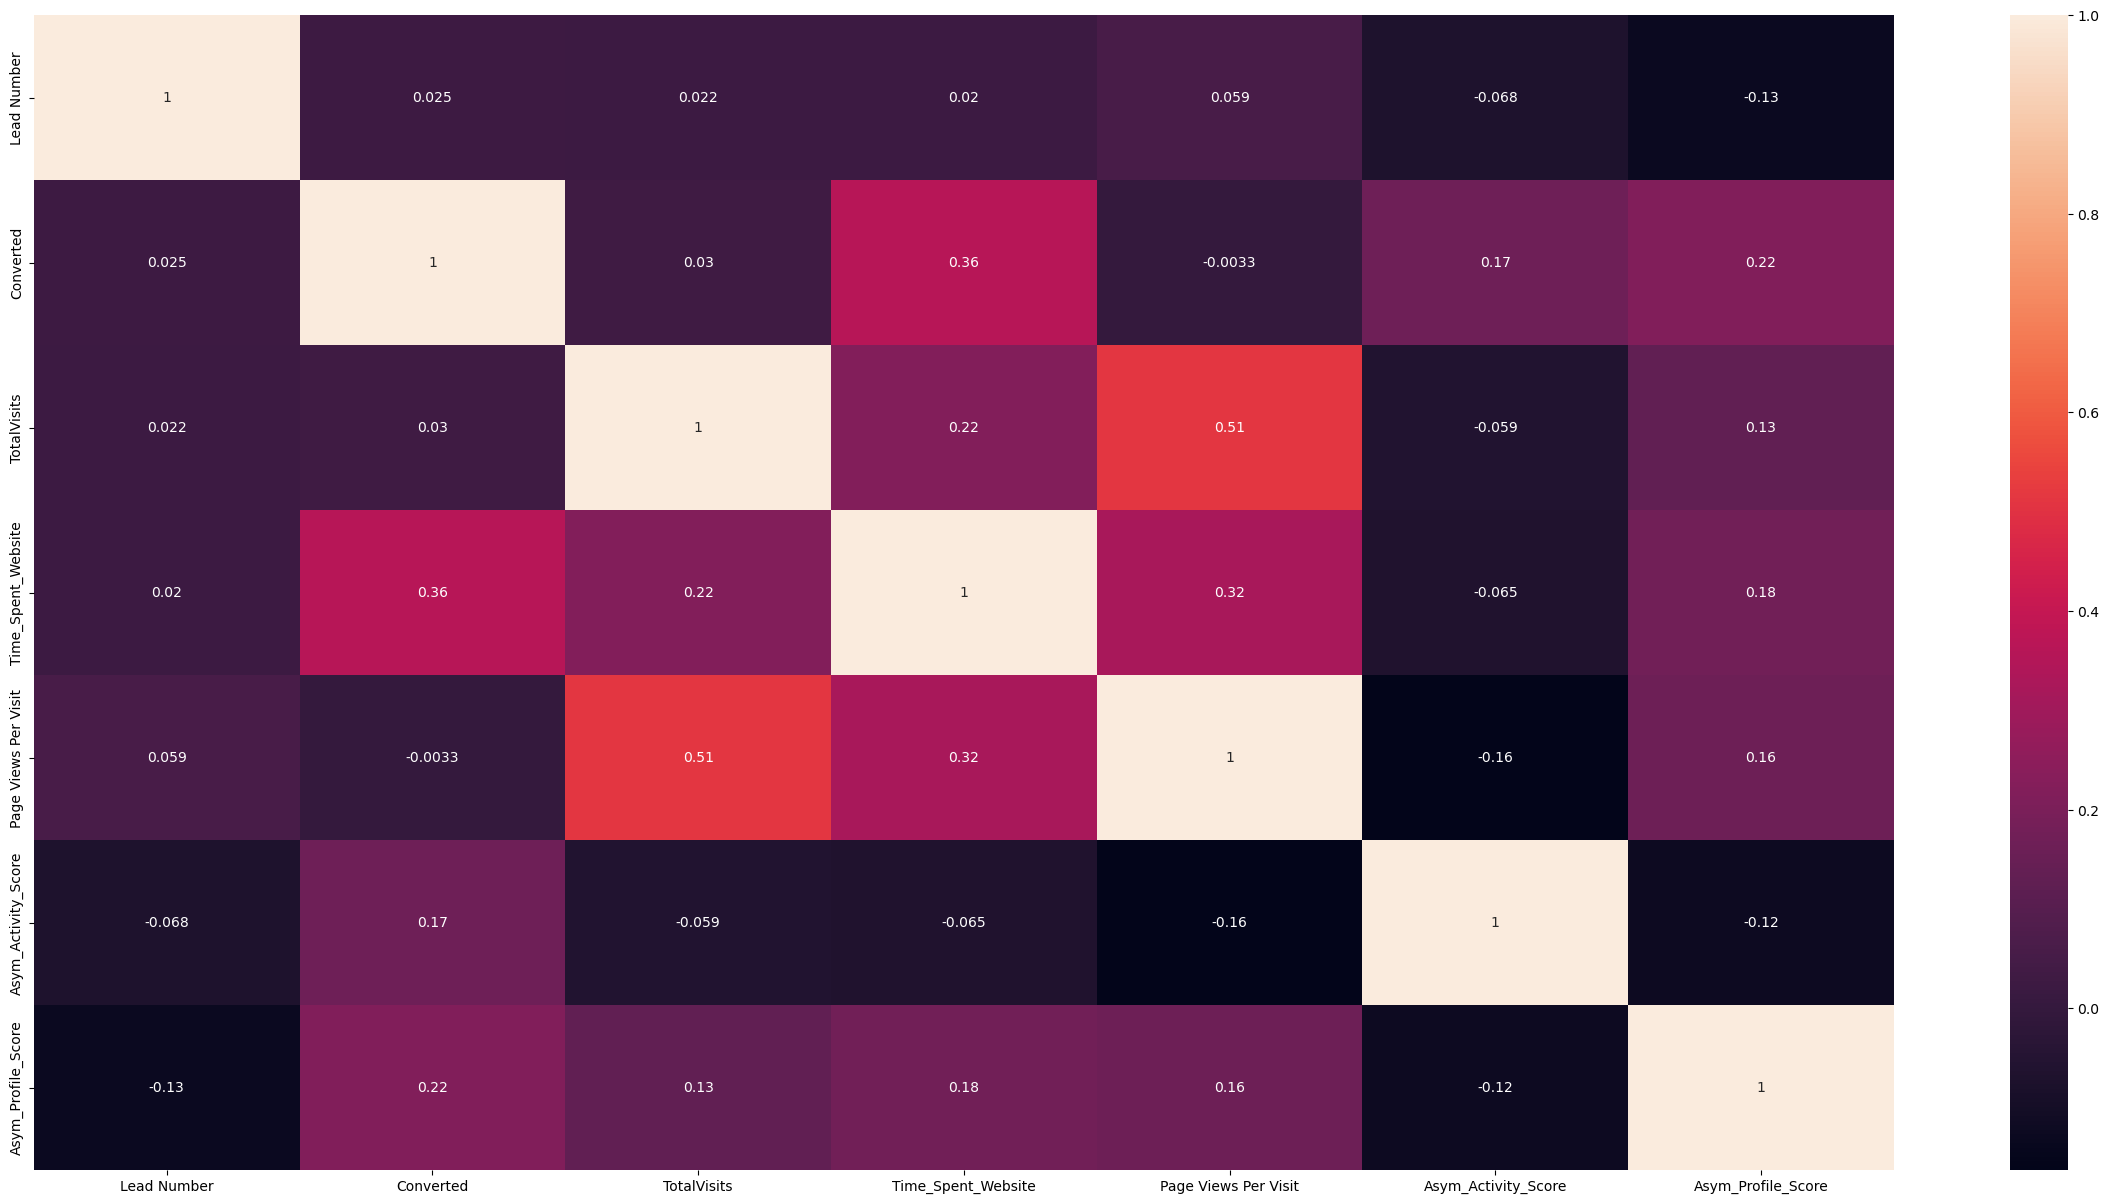

In [41]:
##Draw a heatmap to see correlations
plt.figure(figsize=(30,15))
sns.heatmap(lead1.corr(), annot=True)
plt.show()

In [42]:
lead1.rename(columns={'Page Views Per Visit':'Page_View_Visit'}, inplace=True)

In [43]:
sns.boxplot(lead1.Page_View_Visit)

<AxesSubplot:xlabel='Page_View_Visit'>

In [44]:
lead1.Page_View_Visit.describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page_View_Visit, dtype: float64

In [45]:
lead1.Page_View_Visit.quantile([0.95])

0.95    6.0
Name: Page_View_Visit, dtype: float64

In [46]:
lead1.Page_View_Visit.quantile([0.10,0.25,0.50,0.75,0.95,0.99,1])

0.10     0.0
0.25     1.0
0.50     2.0
0.75     3.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page_View_Visit, dtype: float64

In [47]:
maxVisit= lead1.Page_View_Visit.max()

In [48]:
lead1 = lead1[lead1['Page_View_Visit']!= maxVisit]

In [49]:
lead1.Page_View_Visit.quantile([0.10,0.25,0.50,0.75,0.95,0.99,1])

0.10     0.0
0.25     1.0
0.50     2.0
0.75     3.0
0.95     6.0
0.99     9.0
1.00    24.0
Name: Page_View_Visit, dtype: float64

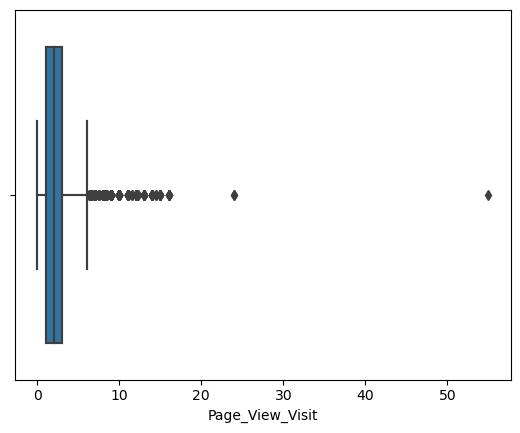

In [50]:
sns.boxplot(lead1.Page_View_Visit)
plt.show()

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(lead1.corr(), annot=True)

<AxesSubplot:>

In [52]:
# Print the null percetange of each column of inp1.
lead1.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Time_Spent_Website                           0
Page_View_Visit                            137
Last Activity                              103
Country                                   2461
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Receive More Updates About Our Courses       0
Tags         

In [53]:
lead1.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

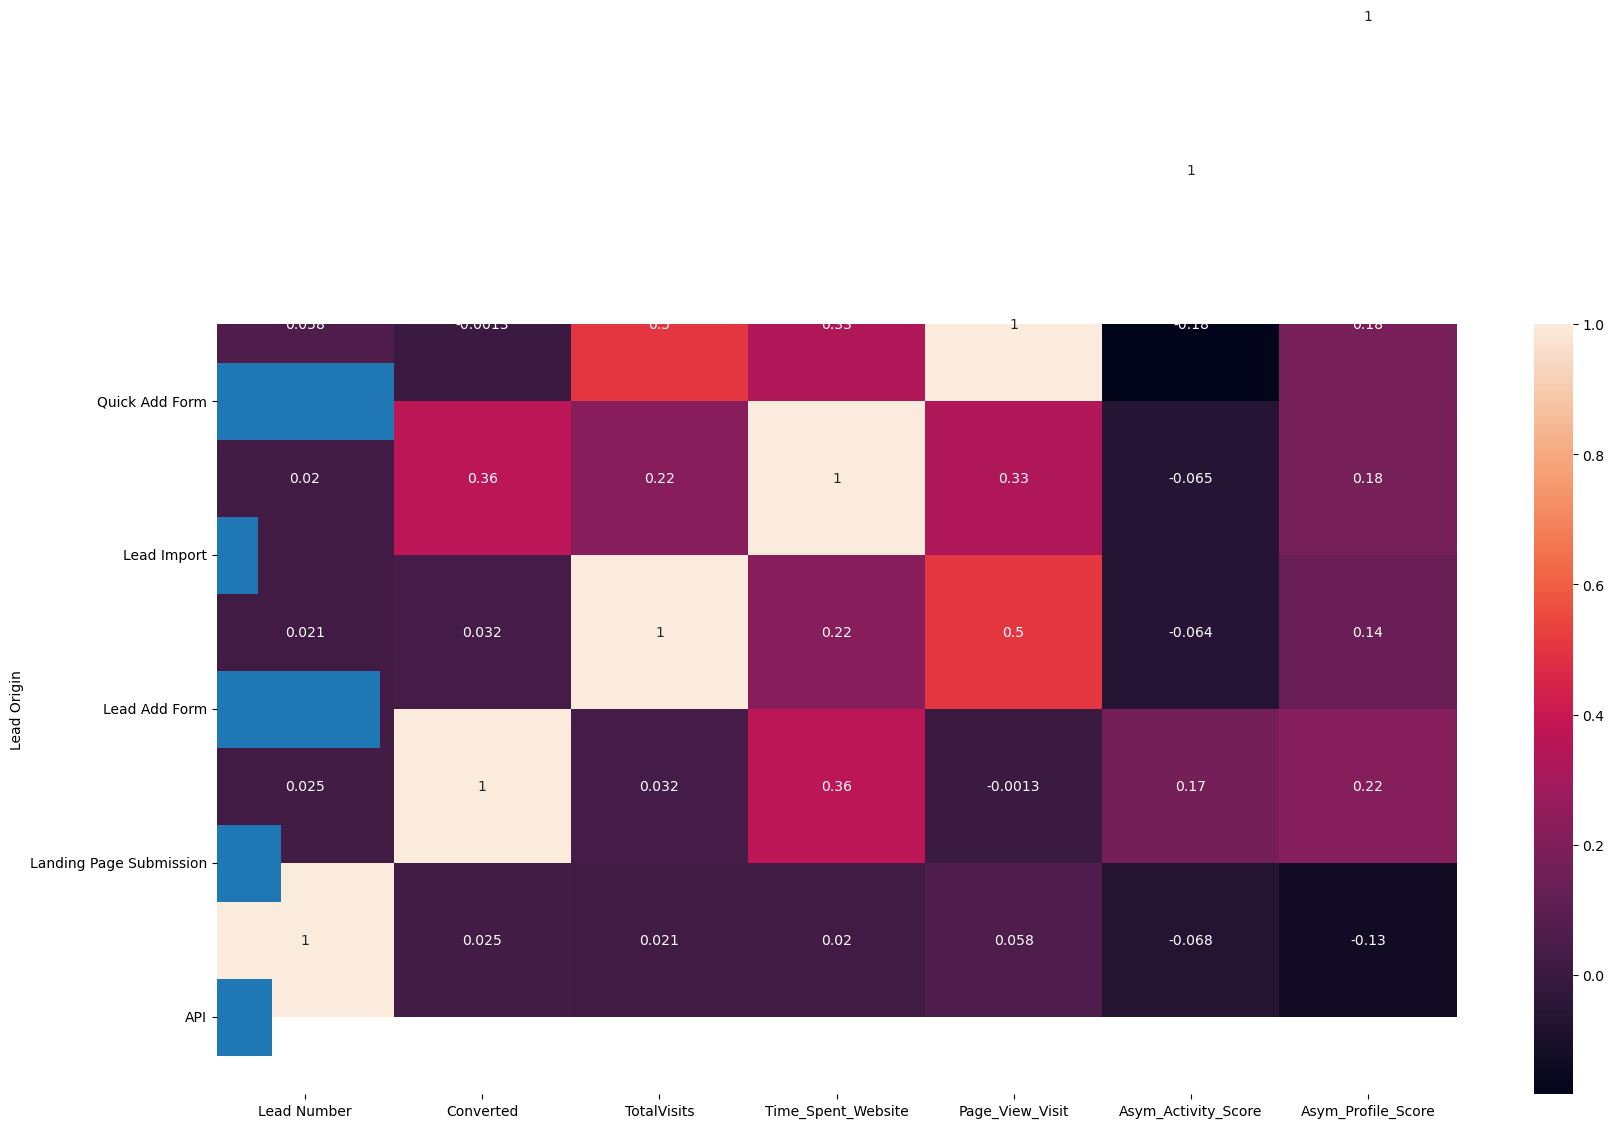

In [54]:
lead1.groupby(['Lead Origin'])['Converted'].mean().plot.barh()
plt.show()

In [55]:
lead1.replace({'Asym_Activity_Index' : {'01.High' : 'High', '02.Medium' : 'Medium','03.Low':'Low'},'Asym_Profile_Index':{'01.High' : 'High', '02.Medium' : 'Medium','03.Low':'Low'}}, inplace=True)

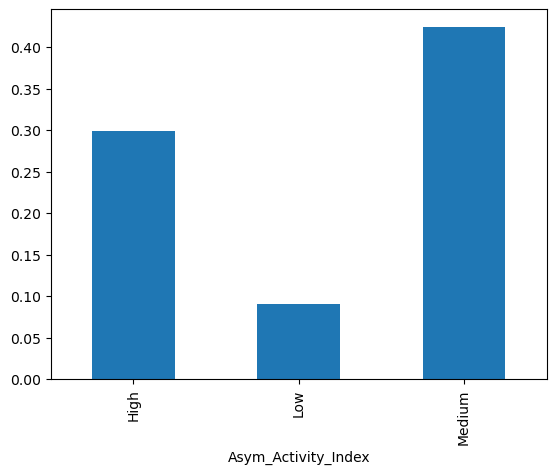

In [56]:
lead1.groupby(['Asym_Activity_Index'])['Converted'].mean().plot.bar()
plt.show()

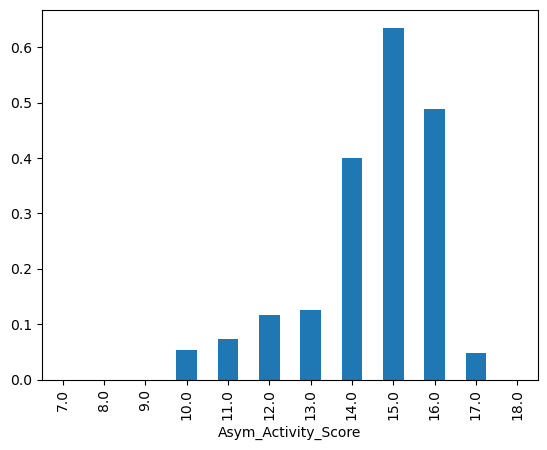

In [57]:
lead1.groupby(['Asym_Activity_Score'])['Converted'].mean().plot.bar()
plt.show()

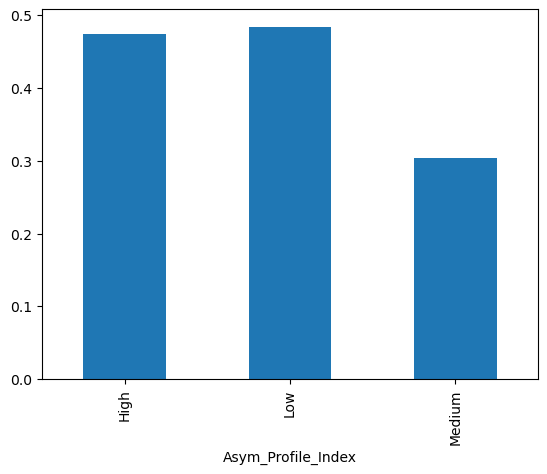

In [58]:
lead1.groupby(['Asym_Profile_Index'])['Converted'].mean().plot.bar()
plt.show()

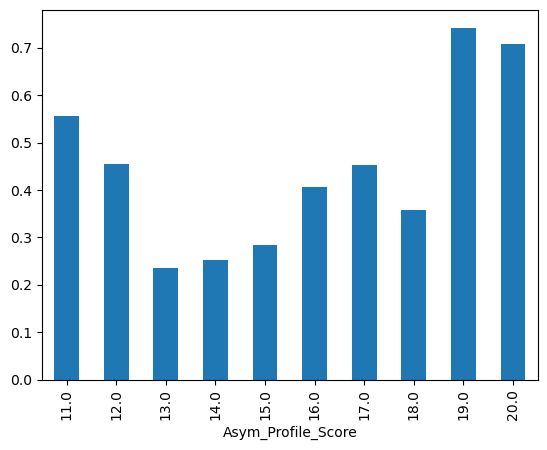

In [59]:
lead1.groupby(['Asym_Profile_Score'])['Converted'].mean().plot.bar()
plt.show()

In [60]:
lead1.Converted.value_counts(normalize=True)

0    0.614569
1    0.385431
Name: Converted, dtype: float64

The above analysis shows that when Asym_Profile_Index is not a good factor to consider for Converted
Asym_Activity_Index is better

In [61]:
lead1.Converted.mean()

0.3854313237363351

Number of nulls for  Asym_Activity_Index

In [62]:
lead1['Asym_Activity_Index'].isnull().sum()

4218

In [63]:
lead1['Asym_Profile_Index'].isnull().sum()

4218

In [64]:
lead1['Asym_Activity_Score'].isnull().sum()

4218

In [65]:
lead1['Asym_Profile_Score'].isnull().sum()

4218

42% null values means we need to drop these columns.

In [66]:
lead1 = lead1.drop(['Asym_Activity_Index','Asym_Profile_Index','Asym_Activity_Score','Asym_Profile_Score'],1)

lead1.groupby(['Asym_Profile_Score'])['Converted'].mean().plot.bar()
plt.show()

In [67]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Time_Spent_Website', 'Page_View_Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [68]:
lead1.shape

(9239, 27)

In [69]:
lead1['How did you hear about X Education'].value_counts()

Select                   5042
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [70]:
lead1.rename(columns= {'How did you hear about X Education':'Hear_About_XEducation'}, inplace=True)

In [71]:
lead_select = lead1.loc[lead1['Hear_About_XEducation'] == 'Select']

In [72]:
lead_select.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time_Spent_Website,Page_View_Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,India,...,No,No,No,No,Ringing,NaN,Select,Select,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,India,...,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Yes,Email Opened
10,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,India,...,No,No,No,No,Will revert after reading the email,Might be,Select,Other Metro Cities,Yes,Email Opened
11,660570,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,India,...,No,No,No,No,Lost to EINS,NaN,Select,Thane & Outskirts,Yes,Page Visited on Website


In [73]:
lead1.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [74]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9239 non-null   int64  
 1   Lead Origin                             9239 non-null   object 
 2   Lead Source                             9203 non-null   object 
 3   Do Not Email                            9239 non-null   object 
 4   Converted                               9239 non-null   int64  
 5   TotalVisits                             9102 non-null   float64
 6   Time_Spent_Website                      9239 non-null   int64  
 7   Page_View_Visit                         9102 non-null   float64
 8   Last Activity                           9136 non-null   object 
 9   Country                                 6778 non-null   object 
 10  Specialization                          7801 non-null   obje

In [75]:
lead1.rename(columns= {'Last Activity':'Last_Activity'}, inplace=True)

In [76]:
lead1['Last_Activity'].describe()

count             9136
unique              17
top       Email Opened
freq              3437
Name: Last_Activity, dtype: object

It is duplicate of Last Natable Activity, we are dropping this, as this does not have significant impact on model

In [77]:
lead1.drop('Last_Activity', axis = 1, inplace=True)

In [78]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Time_Spent_Website', 'Page_View_Visit',
       'Country', 'Specialization', 'Hear_About_XEducation',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [79]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9239 non-null   int64  
 1   Lead Origin                             9239 non-null   object 
 2   Lead Source                             9203 non-null   object 
 3   Do Not Email                            9239 non-null   object 
 4   Converted                               9239 non-null   int64  
 5   TotalVisits                             9102 non-null   float64
 6   Time_Spent_Website                      9239 non-null   int64  
 7   Page_View_Visit                         9102 non-null   float64
 8   Country                                 6778 non-null   object 
 9   Specialization                          7801 non-null   object 
 10  Hear_About_XEducation                   7032 non-null   obje

In [80]:
lead1.rename(columns={'Email Bounced':'Last_Activity_Email_Bounced', 'Email Link Clicked':'Last_Activity_Email_Link_Clicked','Email Marked Spam':'Last_Activity_Email_Marked_Spam'}, inplace=True)

In [81]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Time_Spent_Website', 'Page_View_Visit',
       'Country', 'Specialization', 'Hear_About_XEducation',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [82]:
lead1.rename(columns={'Email Opened':'Last_Activity_Email_Opened','Email Received':'Last_Activity_Email_Received'}, inplace=True)

In [83]:
lead1.rename(columns={'Form Submitted on Website':'Last_Activity_Form_Submitted_on_Website','Had a Phone Conversation':'Last_Activity_Phone_Conversation'}, inplace=True)

In [84]:
lead1.rename(columns={'Modified':'Last_Activity_Modified','Olark Chat Conversation':'Last_Activity_Chat_Conversation'}, inplace=True)

In [85]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Time_Spent_Website', 'Page_View_Visit',
       'Country', 'Specialization', 'Hear_About_XEducation',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [86]:
lead1.rename(columns={'Page Visited on Website':'Last_Activity_Page_on_Website','Resubscribed to emails':'Last_Activity_Resubscribed_emails'}, inplace=True)

In [87]:
lead1.rename(columns={'SMS Sent':'Last_Activity_SMS_Sent','Unreachable':'Last_Activity_Unreachable','Unsubscribed':'Last_Activity_Unsubscribed'}, inplace=True)

In [88]:
lead1.rename(columns={'View in browser link Clicked':'Last_Activity_Browser_Link'}, inplace=True)

In [89]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9239 non-null   int64  
 1   Lead Origin                             9239 non-null   object 
 2   Lead Source                             9203 non-null   object 
 3   Do Not Email                            9239 non-null   object 
 4   Converted                               9239 non-null   int64  
 5   TotalVisits                             9102 non-null   float64
 6   Time_Spent_Website                      9239 non-null   int64  
 7   Page_View_Visit                         9102 non-null   float64
 8   Country                                 6778 non-null   object 
 9   Specialization                          7801 non-null   object 
 10  Hear_About_XEducation                   7032 non-null   obje

In [90]:
lead1['Last Notable Activity'].value_counts()

Modified                        3406
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

I think we can drop Last_Activity_Browser_Link

In [91]:
def plot_countplot(data, x, hue):
    plt.figure(figsize = (20,5))
    ax = sns.countplot(data=data, x=x, hue=hue)

    # Add annotations
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.03 , p.get_height() * 1.01))

    plt.xticks(rotation=90)
    ax.set_yscale('log')

    plt.show()


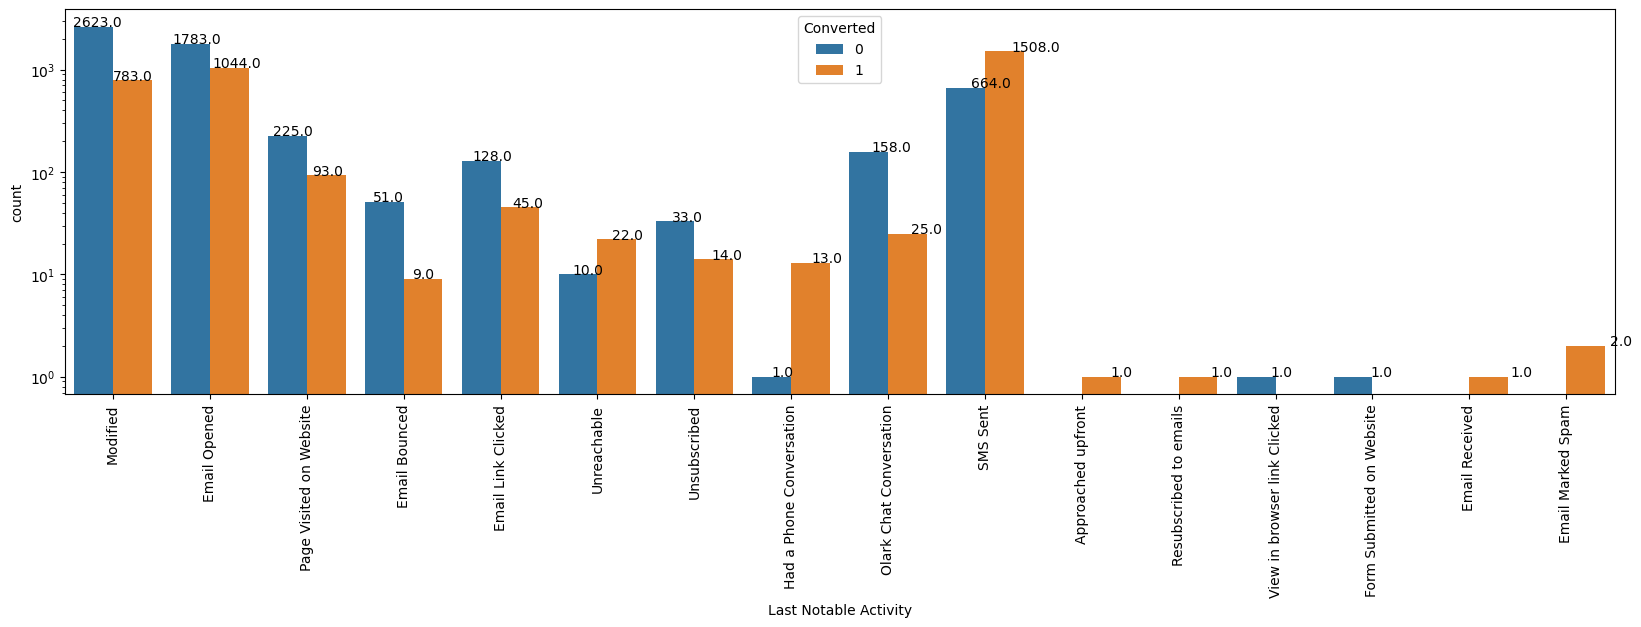

In [92]:
plot_countplot(data=lead1, x="Last Notable Activity", hue="Converted")



 SMS sent, can have a signifficant impact on model as Conversion rate for leads with last activity as SMS Sent is above 60%

In [93]:
lead1.rename(columns = {'Last Notable Activity':'Notable_Activity', 'What is your current occupation':'Occupation'}, inplace = True)

In [94]:
lead1.Occupation.value_counts()

Unemployed              5599
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In Occupation no NAN values


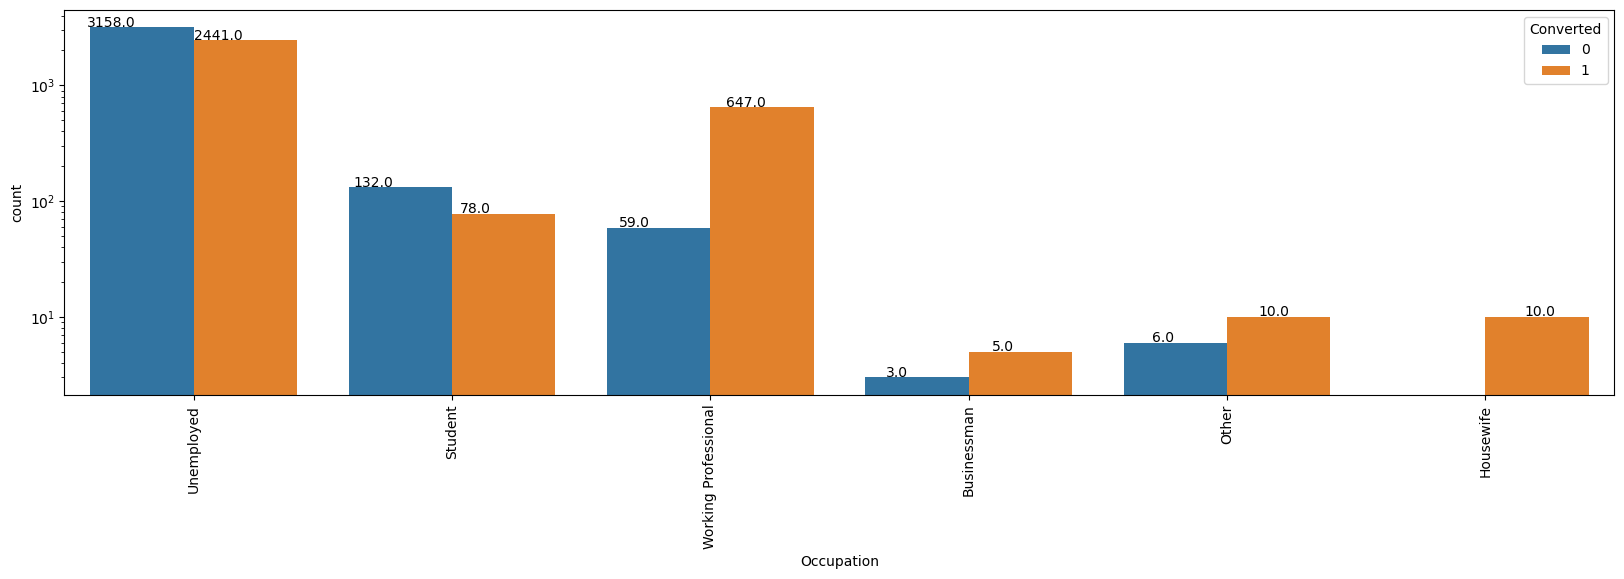

In [95]:
plot_countplot(data=lead1, x="Occupation", hue="Converted")

In [96]:
dummies = pd.get_dummies(lead1['Occupation'],drop_first=True)


In [97]:
dummies

,Housewife,Other,Student,Unemployed,Working Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
9235,0,0,0,1,0
9236,0,0,0,1,0
9237,0,0,0,1,0
9238,0,0,0,0,0


In [98]:
lead1 = pd.concat([lead1,dummies], axis = 1)

In [99]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Time_Spent_Website', 'Page_View_Visit',
       'Country', 'Specialization', 'Hear_About_XEducation', 'Occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Notable_Activity', 'Housewife', 'Other', 'Student', 'Unemployed',
       'Working Professional'],
      dtype='object')

we can see here student and unemployed are not much interested in  the course
major lead conversion is from the Unemployed Group, Unemployed can have a significant impact on the model

In [100]:
lead1['City'].value_counts(dropna=False)


Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    685
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

More than 50% of the data is Mumbai so we can impute Mumbai in the missing values.

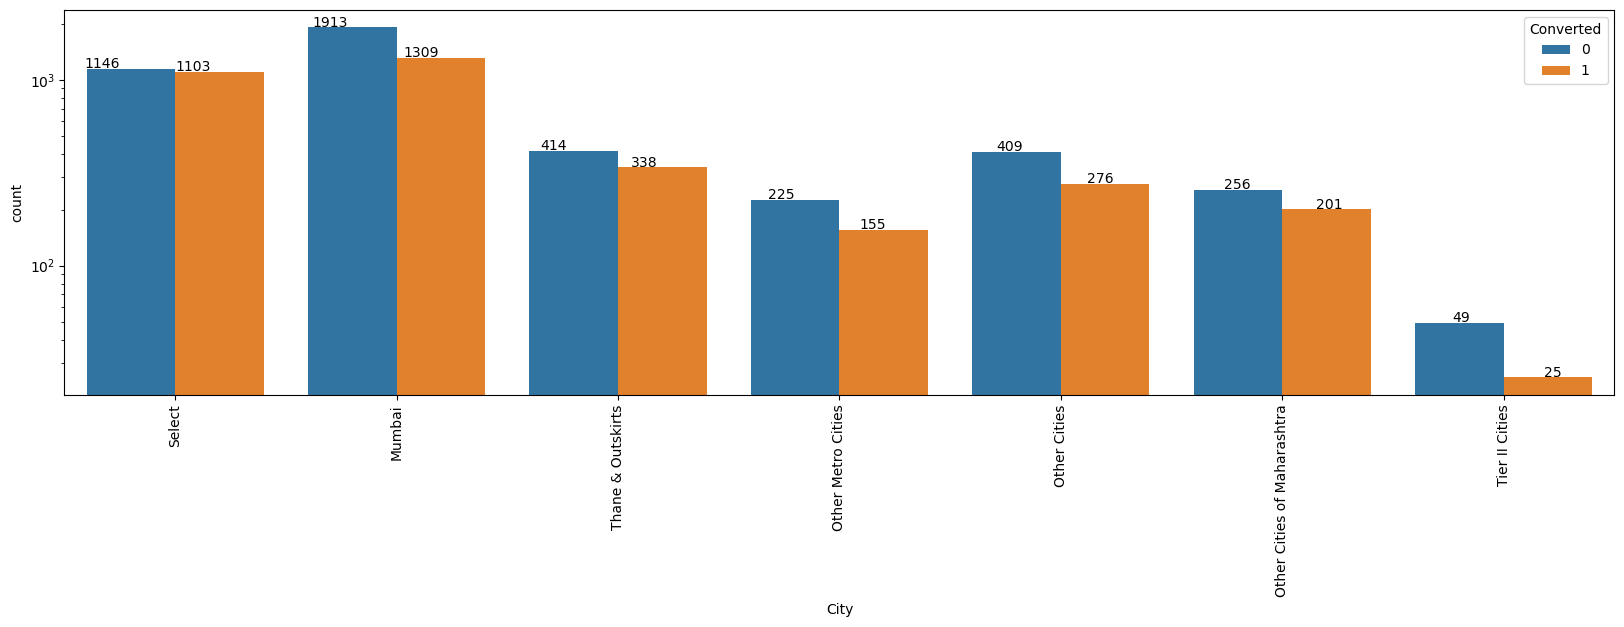

In [101]:
plot_countplot(data=lead1, x="City", hue="Converted")

In City around 50% values are either Select or Nan so we can drop City

In [102]:
lead1['City'] = lead1['City'].replace('Select', 'Mumbai')

In [103]:
lead1['City'] = lead1['City'].replace('np.nan', 'Mumbai')

In [104]:
lead1['City']= lead1['City'].replace({'Thane & Outskirts':'Other Cities', 'Other Cities of Maharashtra':'Other Cities', 'Other Metro Cities':'Other Cities', 'Tier II Cities':'Other Cities'})

In [105]:
lead1.City.value_counts(normalize=True)

Mumbai          0.699706
Other Cities    0.300294
Name: City, dtype: float64

In [106]:
lead1['Country'].value_counts(dropna=False)

India                   6491
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [107]:
print('Missing values count --->', lead1['Specialization'].isna().sum())

Missing values count ---> 1438


 Country is India for most values so we can use this value to fill all NaN.

In [108]:
lead1['Country'] = lead1['Country'].replace(np.nan, 'India')

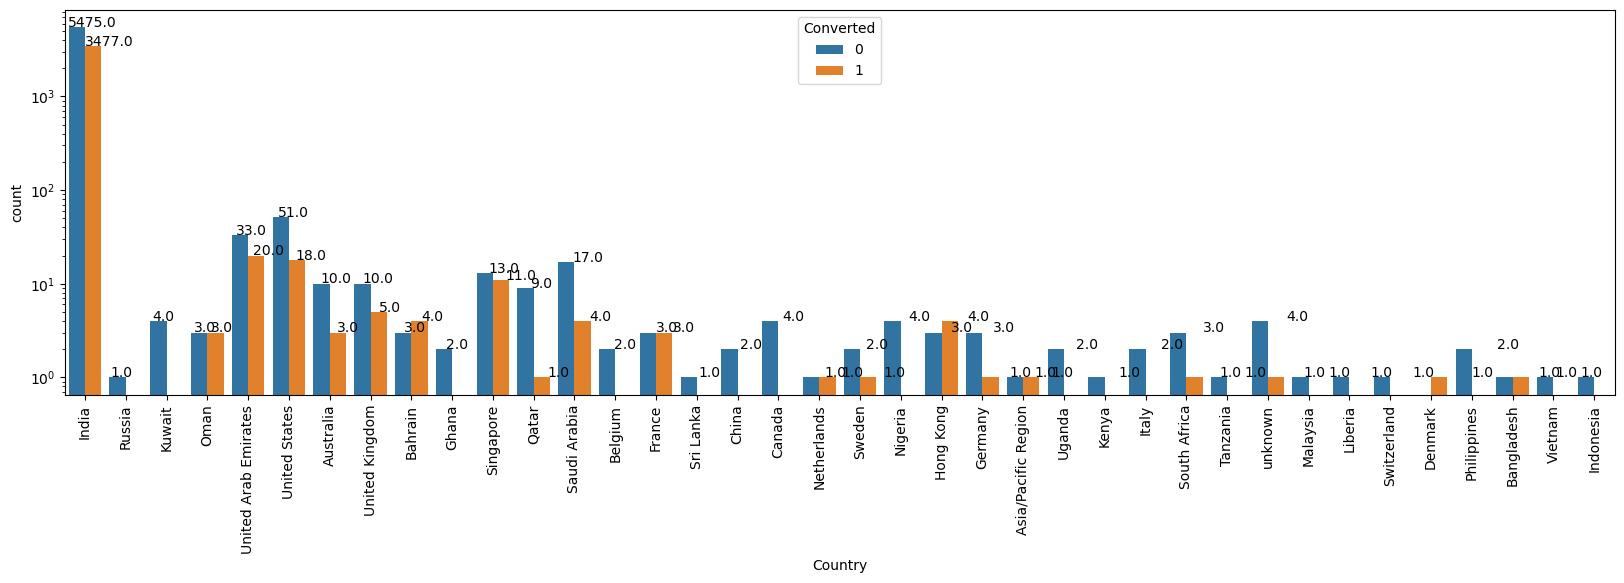

In [109]:
plot_countplot(data=lead1, x="Country", hue="Converted")

Most values in Country is India, this feature cannot have signiticant impact on the model

In [110]:
lead1.drop('Country', axis = 1, inplace=True)

In [111]:
lead1['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                365
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

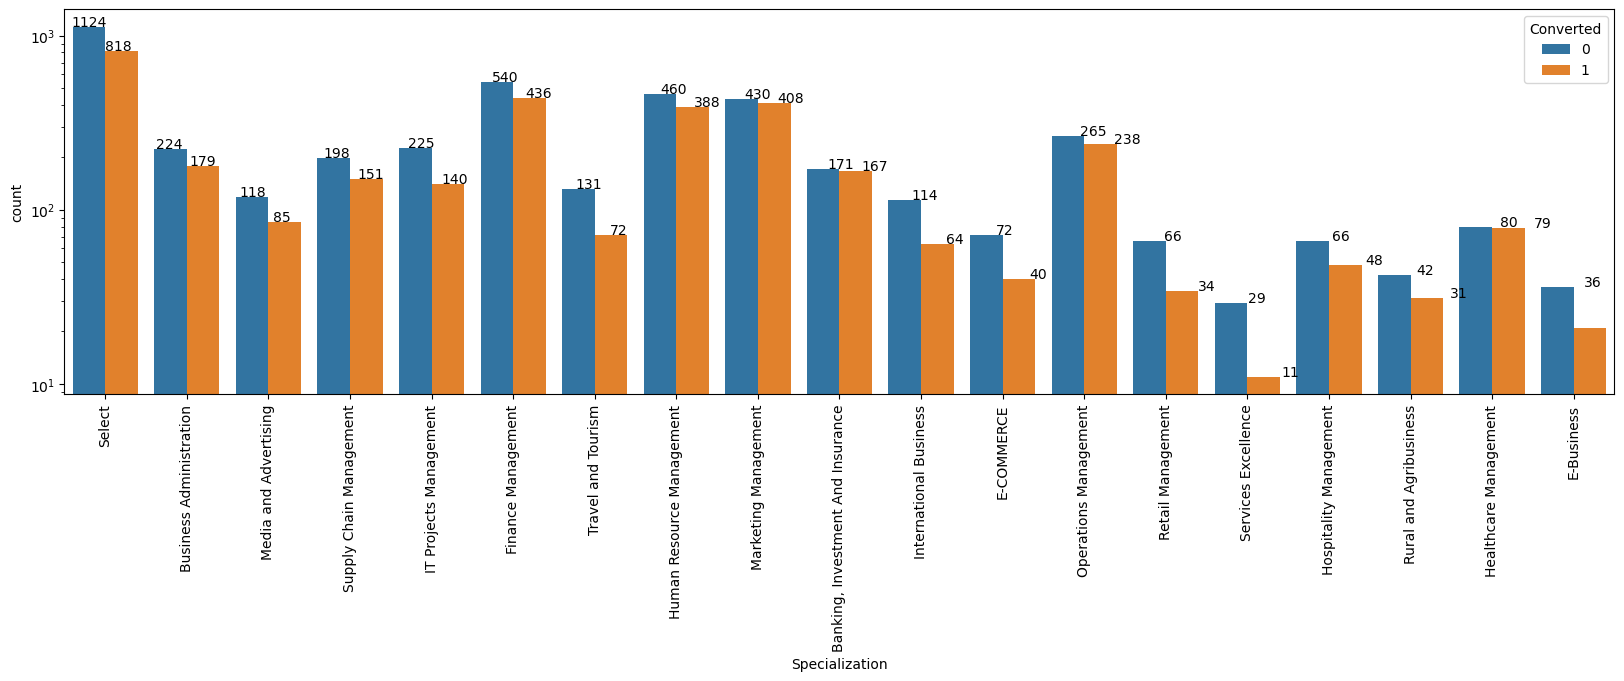

In [112]:
plot_countplot(data=lead1, x="Specialization", hue="Converted")

In [113]:
lead1.drop('Specialization', axis = 1, inplace=True)

In [114]:
lead1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

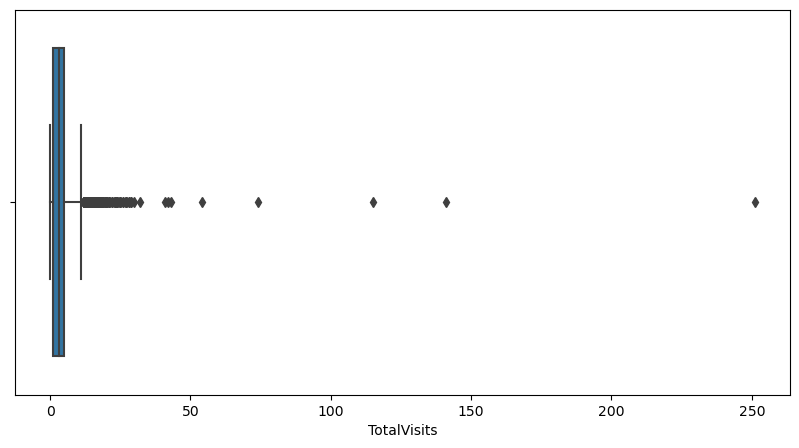

In [115]:
plt.figure(figsize = (10,5))
sns.boxplot(lead1['TotalVisits'])
plt.show()

RV will bucket /bin for TotalVisits


We can see there are outliers, We will cap the outliers from 0.5% to 95% value for analysis

In [116]:
percentiles = lead1['TotalVisits'].quantile([0.05,0.95]).values
lead1['TotalVisits'][lead1['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead1['TotalVisits'][lead1['TotalVisits'] >= percentiles[1]] = percentiles[1]

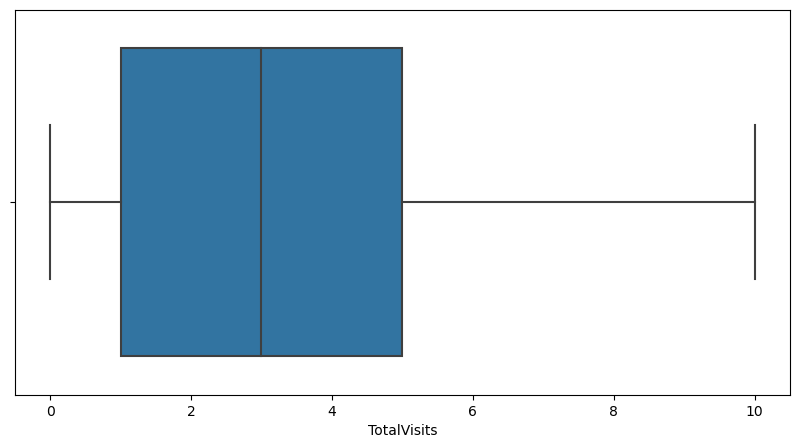

In [117]:
plt.figure(figsize = (10,5))
sns.boxplot(lead1['TotalVisits'])
plt.show()

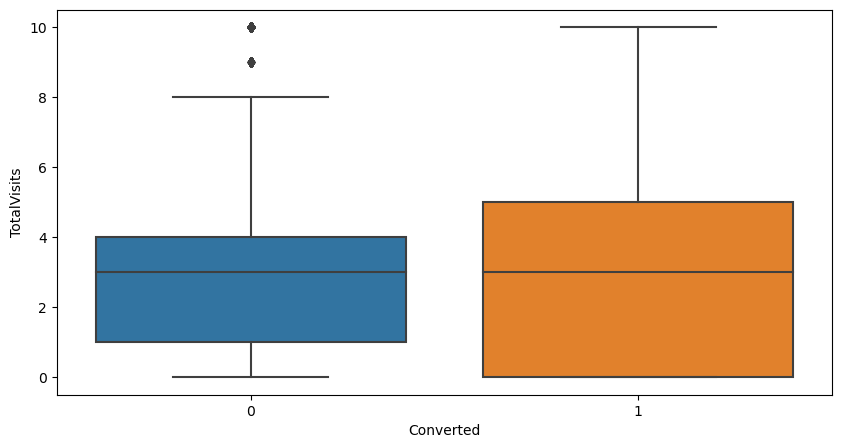

In [118]:
plt.figure(figsize = (10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead1)
plt.show()

Median for converted and not converted leads are the same.
No conclusions can be done on the basis of TotalVisits

In [119]:
lead1['Search'].value_counts()

No     9225
Yes      14
Name: Search, dtype: int64

Most of the values are No, almost  99%, this feature may not have significant effect on the model

In [120]:
lead1.drop('Search', axis = 1, inplace=True)

In [121]:
lead1['Magazine'].value_counts()

No    9239
Name: Magazine, dtype: int64

All entries are 'No'.this feature may not have significant effect on the model

In [122]:
lead1.drop('Magazine', axis = 1, inplace=True)

In [123]:
lead1['Newspaper Article'].value_counts()

No     9237
Yes       2
Name: Newspaper Article, dtype: int64

All entries are 'No'.this feature may not have significant effect on the model

In [124]:
lead1.drop('Newspaper Article', axis = 1, inplace=True)

In [125]:
lead1['Digital Advertisement'].value_counts()

No     9235
Yes       4
Name: Digital Advertisement, dtype: int64

Almost entries are 'No'.this feature may not have significant effect on the model

In [126]:
lead1.drop('Digital Advertisement', axis = 1, inplace=True)

In [127]:
lead1['Through Recommendations'].value_counts()

No     9232
Yes       7
Name: Through Recommendations, dtype: int64

Almost entries are 'No'.this feature may not play any role in decision making.

In [128]:
lead1.drop('Through Recommendations', axis = 1, inplace=True)

In [129]:
lead1['Receive More Updates About Our Courses'].value_counts()

No    9239
Name: Receive More Updates About Our Courses, dtype: int64

Almost entries are 'No'.this feature may not play any role in decision making.

In [130]:
lead1.drop('Receive More Updates About Our Courses', axis = 1, inplace=True)

In [131]:
lead1['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2887
Name: A free copy of Mastering The Interview, dtype: int64

In [132]:
def plot_countplot_small(data, x, hue):
    plt.figure(figsize = (8,5))
    ax = sns.countplot(data=data, x=x, hue=hue)

    # Add annotations
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()))

    plt.xticks(rotation=90)
    ax.set_yscale('linear')

    plt.show()

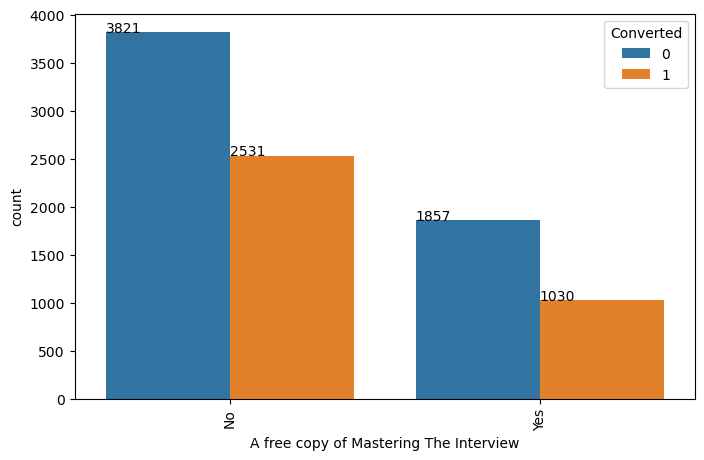

In [133]:
plot_countplot_small(data=lead1, x="A free copy of Mastering The Interview", hue="Converted")

In [134]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Time_Spent_Website', 'Page_View_Visit',
       'Hear_About_XEducation', 'Occupation', 'X Education Forums',
       'Newspaper', 'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Notable_Activity',
       'Housewife', 'Other', 'Student', 'Unemployed', 'Working Professional'],
      dtype='object')

In [135]:
lead1.TotalVisits.value_counts()

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
10.0     466
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
Name: TotalVisits, dtype: int64

In [136]:
lead1.TotalVisits.describe()

count    9102.000000
mean        3.181169
std         2.781069
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: TotalVisits, dtype: float64

In [137]:
lead1['TotalVisits_bins'] = pd.cut(lead1['TotalVisits'], 5)

In [138]:
lead1.TotalVisits_bins

0       (-0.01, 2.0]
1         (4.0, 6.0]
2       (-0.01, 2.0]
3       (-0.01, 2.0]
4       (-0.01, 2.0]
            ...     
9235      (6.0, 8.0]
9236    (-0.01, 2.0]
9237    (-0.01, 2.0]
9238      (2.0, 4.0]
9239      (4.0, 6.0]
Name: TotalVisits_bins, Length: 9239, dtype: category
Categories (5, interval[float64, right]): [(-0.01, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0]]

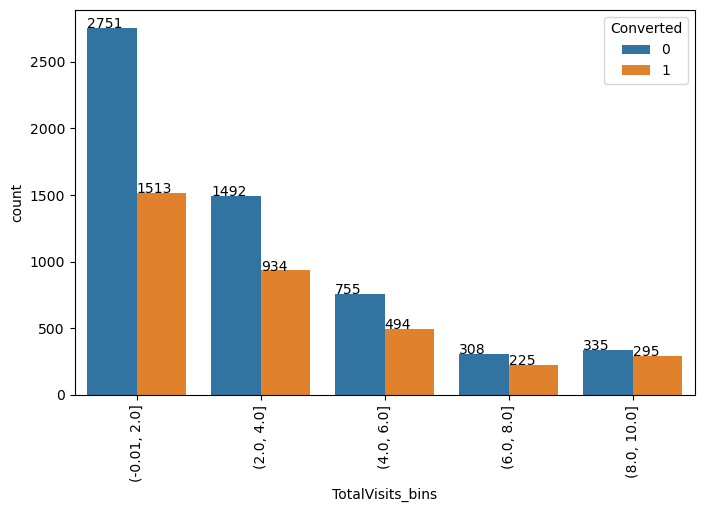

In [139]:
plot_countplot_small(data=lead1, x="TotalVisits_bins", hue="Converted")

In [140]:
lead1.shape

(9239, 24)

In [141]:
lead1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time_Spent_Website,Page_View_Visit,Hear_About_XEducation,Occupation,...,Lead Profile,City,A free copy of Mastering The Interview,Notable_Activity,Housewife,Other,Student,Unemployed,Working Professional,TotalVisits_bins
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Select,Unemployed,...,Select,Mumbai,No,Modified,0,0,0,1,0,"(-0.01, 2.0]"
1,660728,API,Organic Search,No,0,5.0,674,2.5,Select,Unemployed,...,Select,Mumbai,No,Email Opened,0,0,0,1,0,"(4.0, 6.0]"
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Select,Student,...,Potential Lead,Mumbai,Yes,Email Opened,0,0,1,0,0,"(-0.01, 2.0]"
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Word Of Mouth,Unemployed,...,Select,Mumbai,No,Modified,0,0,0,1,0,"(-0.01, 2.0]"
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Other,Unemployed,...,Select,Mumbai,No,Modified,0,0,0,1,0,"(-0.01, 2.0]"


In [142]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Time_Spent_Website', 'Page_View_Visit',
       'Hear_About_XEducation', 'Occupation', 'X Education Forums',
       'Newspaper', 'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Notable_Activity',
       'Housewife', 'Other', 'Student', 'Unemployed', 'Working Professional',
       'TotalVisits_bins'],
      dtype='object')

In [143]:
lead1['Do Not Email'].value_counts(normalize=True)

No     0.920662
Yes    0.079338
Name: Do Not Email, dtype: float64

In [144]:
lead1.drop('Do Not Email',axis=1, inplace=True)

In [145]:
dummies = pd.get_dummies(lead1['Notable_Activity'],drop_first=True)

In [146]:
dummies

,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [147]:
lead1 = pd.concat([lead1,dummies], axis = 1)

In [148]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Time_Spent_Website', 'Page_View_Visit', 'Hear_About_XEducation',
       'Occupation', 'X Education Forums', 'Newspaper', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Notable_Activity', 'Housewife', 'Other', 'Student', 'Unemployed',
       'Working Professional', 'TotalVisits_bins', 'Email Bounced',
       'Email Link Clicked', 'Email Marked Spam', 'Email Opened',
       'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked'],
      dtype='object')

In [149]:
lead1.drop(['Occupation','Notable_Activity'], axis=1, inplace=True)

In [150]:
lead1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Time_Spent_Website', 'Page_View_Visit', 'Hear_About_XEducation',
       'X Education Forums', 'Newspaper', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Housewife', 'Other', 'Student', 'Unemployed', 'Working Professional',
       'TotalVisits_bins', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Email Received',
       'Form Submitted on Website', 'Had a Phone Conversation', 'Modified',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked'],
      dtype='object')

Rename columns

In [151]:
lead1.rename(columns= {'Lead Number':'Lead_Number', 'Lead Origin': 'Lead_Origin','Lead Source':'Lead_Source','X Education Forums':'X_Education_Forums', 'Lead Quality':'Lead_Quality','Lead Profile':'Lead_Profile'}, inplace = True)

In [152]:
lead1.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Time_Spent_Website', 'Page_View_Visit', 'Hear_About_XEducation',
       'X_Education_Forums', 'Newspaper', 'Tags', 'Lead_Quality',
       'Lead_Profile', 'City', 'A free copy of Mastering The Interview',
       'Housewife', 'Other', 'Student', 'Unemployed', 'Working Professional',
       'TotalVisits_bins', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Email Received',
       'Form Submitted on Website', 'Had a Phone Conversation', 'Modified',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked'],
      dtype='object')

In [153]:
lead1.rename(columns = {'A free copy of Mastering The Interview':'Interview_Copy','Working Professional':'Working_Professional','Email Bounced':'Email_Bounced','Email Link Clicked':'Email_Link_Clicked'   }, inplace = True)

In [154]:
lead1.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Time_Spent_Website', 'Page_View_Visit', 'Hear_About_XEducation',
       'X_Education_Forums', 'Newspaper', 'Tags', 'Lead_Quality',
       'Lead_Profile', 'City', 'Interview_Copy', 'Housewife', 'Other',
       'Student', 'Unemployed', 'Working_Professional', 'TotalVisits_bins',
       'Email_Bounced', 'Email_Link_Clicked', 'Email Marked Spam',
       'Email Opened', 'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked'],
      dtype='object')

In [155]:
lead1.rename(columns = {'Email Marked Spam':'Email_Marked_Spam', 'Email Opened':'Email_Opened','Email Received':'Email_Received','Form Submitted on Website':'Form_Submitted_on_Website' }, inplace = True)

In [156]:
lead1.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Time_Spent_Website', 'Page_View_Visit', 'Hear_About_XEducation',
       'X_Education_Forums', 'Newspaper', 'Tags', 'Lead_Quality',
       'Lead_Profile', 'City', 'Interview_Copy', 'Housewife', 'Other',
       'Student', 'Unemployed', 'Working_Professional', 'TotalVisits_bins',
       'Email_Bounced', 'Email_Link_Clicked', 'Email_Marked_Spam',
       'Email_Opened', 'Email_Received', 'Form_Submitted_on_Website',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked'],
      dtype='object')

In [157]:
lead1.rename(columns = {'Had a Phone Conversation':'Phone_Conversation', 'Olark Chat Conversation': 'Chat_Conversation','Page Visited on Website': 'Page_Visited_on_Website', 'Resubscribed to emails':'Resubscribed_emails','SMS Sent':'SMS_Sent', 'View in browser link Clicked': 'Browser_link_Clicked' }, inplace = True)

In [158]:
lead1.columns

Index(['Lead_Number', 'Lead_Origin', 'Lead_Source', 'Converted', 'TotalVisits',
       'Time_Spent_Website', 'Page_View_Visit', 'Hear_About_XEducation',
       'X_Education_Forums', 'Newspaper', 'Tags', 'Lead_Quality',
       'Lead_Profile', 'City', 'Interview_Copy', 'Housewife', 'Other',
       'Student', 'Unemployed', 'Working_Professional', 'TotalVisits_bins',
       'Email_Bounced', 'Email_Link_Clicked', 'Email_Marked_Spam',
       'Email_Opened', 'Email_Received', 'Form_Submitted_on_Website',
       'Phone_Conversation', 'Modified', 'Chat_Conversation',
       'Page_Visited_on_Website', 'Resubscribed_emails', 'SMS_Sent',
       'Unreachable', 'Unsubscribed', 'Browser_link_Clicked'],
      dtype='object')

In [159]:
uint_variables = ['Housewife','Other','Student', 'Unemployed', 'Working_Professional']

In [160]:
lead1[uint_variables] = lead1[uint_variables].astype('int64')

In [161]:
uint_variables = ['Email_Bounced', 'Email_Link_Clicked', 'Email_Marked_Spam',
       'Email_Opened', 'Email_Received', 'Form_Submitted_on_Website',
       'Phone_Conversation', 'Modified', 'Chat_Conversation',
       'Page_Visited_on_Website', 'Resubscribed_emails', 'SMS_Sent',
       'Unreachable', 'Unsubscribed', 'Browser_link_Clicked']

In [162]:
lead1[uint_variables] = lead1[uint_variables].astype('int64')

In [163]:
dummies = pd.get_dummies(lead1['Lead_Origin'],drop_first=True)

In [164]:
lead1 = pd.concat([lead1,dummies], axis = 1)

In [165]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Lead_Number                9239 non-null   int64   
 1   Lead_Origin                9239 non-null   object  
 2   Lead_Source                9203 non-null   object  
 3   Converted                  9239 non-null   int64   
 4   TotalVisits                9102 non-null   float64 
 5   Time_Spent_Website         9239 non-null   int64   
 6   Page_View_Visit            9102 non-null   float64 
 7   Hear_About_XEducation      7032 non-null   object  
 8   X_Education_Forums         9239 non-null   object  
 9   Newspaper                  9239 non-null   object  
 10  Tags                       5887 non-null   object  
 11  Lead_Quality               4473 non-null   object  
 12  Lead_Profile               6530 non-null   object  
 13  City                       7819 n

In [166]:
lead1.rename(columns={'Landing Page Submission':'Lead_Origin_Landing_Page_Submission','Lead Add Form':'Landing_Origin_Lead_Add_Form', 'Lead Import':'Lead_Origin_Lead_Import','Quick Add Form':'Lead_Origin_Quick_Add_Form' }, inplace=True)

In [167]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Lead_Number                          9239 non-null   int64   
 1   Lead_Origin                          9239 non-null   object  
 2   Lead_Source                          9203 non-null   object  
 3   Converted                            9239 non-null   int64   
 4   TotalVisits                          9102 non-null   float64 
 5   Time_Spent_Website                   9239 non-null   int64   
 6   Page_View_Visit                      9102 non-null   float64 
 7   Hear_About_XEducation                7032 non-null   object  
 8   X_Education_Forums                   9239 non-null   object  
 9   Newspaper                            9239 non-null   object  
 10  Tags                                 5887 non-null   object  
 11  Lead_Quality     

In [168]:
lead1.drop('Lead_Origin', axis=True, inplace = True)

In [169]:
uint_variables = ['Lead_Origin_Landing_Page_Submission','Landing_Origin_Lead_Add_Form','Lead_Origin_Lead_Import', 'Lead_Origin_Quick_Add_Form']

In [170]:
lead1[uint_variables] = lead1[uint_variables].astype('int64')

In [171]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Lead_Number                          9239 non-null   int64   
 1   Lead_Source                          9203 non-null   object  
 2   Converted                            9239 non-null   int64   
 3   TotalVisits                          9102 non-null   float64 
 4   Time_Spent_Website                   9239 non-null   int64   
 5   Page_View_Visit                      9102 non-null   float64 
 6   Hear_About_XEducation                7032 non-null   object  
 7   X_Education_Forums                   9239 non-null   object  
 8   Newspaper                            9239 non-null   object  
 9   Tags                                 5887 non-null   object  
 10  Lead_Quality                         4473 non-null   object  
 11  Lead_Profile     

In [172]:
lead1.drop('TotalVisits_bins', axis=1, inplace=True)

In [173]:
lead1['Page_View_Visit'] = lead1['Page_View_Visit'].fillna(0)


In [174]:
lead1['Time_Spent_Website'] = lead1['Time_Spent_Website'].fillna(0)

In [175]:
lead1['Page_View_Visit'] = lead1['Page_View_Visit'].astype('int64')


In [176]:
lead1['Time_Spent_Website'] = lead1['Time_Spent_Website'].astype('int64')

In [177]:
lead1['TotalVisits'] = lead1['TotalVisits'].fillna(0)
lead1['TotalVisits'] = lead1['TotalVisits'].astype('int64')

In [178]:
lead1.isna().sum()

Lead_Number                               0
Lead_Source                              36
Converted                                 0
TotalVisits                               0
Time_Spent_Website                        0
Page_View_Visit                           0
Hear_About_XEducation                  2207
X_Education_Forums                        0
Newspaper                                 0
Tags                                   3352
Lead_Quality                           4766
Lead_Profile                           2709
City                                   1420
Interview_Copy                            0
Housewife                                 0
Other                                     0
Student                                   0
Unemployed                                0
Working_Professional                      0
Email_Bounced                             0
Email_Link_Clicked                        0
Email_Marked_Spam                         0
Email_Opened                    

In [179]:
lead1.Hear_About_XEducation.value_counts(dropna=False)

Select                   5042
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: Hear_About_XEducation, dtype: int64

In [180]:
lead1.Hear_About_XEducation.fillna('Select', inplace = True)

In [181]:
lead1.Tags.value_counts(dropna=False)

NaN                                                  3352
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [182]:
lead1.Tags.fillna('Will revert after reading the email', inplace = True)

In [183]:
lead1.Lead_Quality.value_counts(dropna=False)

NaN                  4766
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead_Quality, dtype: int64

In [184]:
##Dropping Lead_Quality
lead1.drop('Lead_Quality', inplace=True, axis = 1)

In [185]:
lead1.Lead_Profile.value_counts(dropna=False)

Select                         4145
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead_Profile, dtype: int64

In [186]:
##Dropping Lead_Profile
lead1.drop('Lead_Profile', inplace=True, axis = 1)

In [187]:
lead1.City.value_counts(dropna=False)

Mumbai          5471
Other Cities    2348
NaN             1420
Name: City, dtype: int64

In [188]:
lead1.City.fillna('Mumbai', inplace = True)

In [189]:
lead1.Lead_Source.value_counts(dropna=False)

Google               2868
Direct Traffic       2542
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead_Source, dtype: int64

In [190]:
lead1.Lead_Source.fillna('Google', inplace = True)

In [191]:
vals_to_replace = {'google':'Google', 'bing':'Others', 'Click2call':'Others', 'Press_Release':'Others','Social Media':'Others', 'Live Chat':'Others', 'youtubechannel':'Others','testone':'Others', 'Pay per Click Ads':'Others', 'welearnblog_Home':'Others', 'WeLearn':'Others', 'blog':'Others', 'NC_EDM':'Others' }

In [192]:
lead1['Lead_Source']= lead1['Lead_Source'].map(vals_to_replace)

In [193]:
lead1.Lead_Source.value_counts()

Others    23
Google     5
Name: Lead_Source, dtype: int64

In [194]:
lead1.Hear_About_XEducation.value_counts()

Select                   7249
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: Hear_About_XEducation, dtype: int64

In [195]:
dummies = pd.get_dummies(lead1['Hear_About_XEducation'],prefix= 'Hear_About_XEducation', drop_first=True)

In [196]:
dummies.head()

,Hear_About_XEducation_Email,Hear_About_XEducation_Multiple Sources,Hear_About_XEducation_Online Search,Hear_About_XEducation_Other,Hear_About_XEducation_SMS,Hear_About_XEducation_Select,Hear_About_XEducation_Social Media,Hear_About_XEducation_Student of SomeSchool,Hear_About_XEducation_Word Of Mouth
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0


In [197]:
lead1 = pd.concat([lead1,dummies], axis = 1)

In [198]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Lead_Number                                  9239 non-null   int64 
 1   Lead_Source                                  28 non-null     object
 2   Converted                                    9239 non-null   int64 
 3   TotalVisits                                  9239 non-null   int64 
 4   Time_Spent_Website                           9239 non-null   int64 
 5   Page_View_Visit                              9239 non-null   int64 
 6   Hear_About_XEducation                        9239 non-null   object
 7   X_Education_Forums                           9239 non-null   object
 8   Newspaper                                    9239 non-null   object
 9   Tags                                         9239 non-null   object
 10  City        

In [199]:
lead1.drop('Hear_About_XEducation', axis=1, inplace=True)

In [200]:
lead1.X_Education_Forums.value_counts(dropna=False)

No     9238
Yes       1
Name: X_Education_Forums, dtype: int64

In [201]:
lead1.drop('X_Education_Forums', axis=1, inplace=True)

In [202]:
lead1.Newspaper.value_counts()

No     9238
Yes       1
Name: Newspaper, dtype: int64

In [203]:
lead1.drop('Newspaper', axis=1, inplace=True)

In [204]:
lead1.Tags.value_counts()

Will revert after reading the email                  5424
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [205]:
lead1.drop('Tags', axis=1, inplace=True)

In [206]:
dummies = pd.get_dummies(lead1['City'],prefix= 'City')

In [207]:
dummies

,City_Mumbai,City_Other Cities
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9235,1,0
9236,1,0
9237,1,0
9238,0,1


In [208]:
lead1 = pd.concat([lead1,dummies], axis = 1)

In [209]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Lead_Number                                  9239 non-null   int64 
 1   Lead_Source                                  28 non-null     object
 2   Converted                                    9239 non-null   int64 
 3   TotalVisits                                  9239 non-null   int64 
 4   Time_Spent_Website                           9239 non-null   int64 
 5   Page_View_Visit                              9239 non-null   int64 
 6   City                                         9239 non-null   object
 7   Interview_Copy                               9239 non-null   object
 8   Housewife                                    9239 non-null   int64 
 9   Other                                        9239 non-null   int64 
 10  Student     

In [210]:
lead1.drop('City', axis=1, inplace = True)

In [211]:
lead1.drop('Lead_Source', axis=1, inplace = True)

In [212]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Lead_Number                                  9239 non-null   int64 
 1   Converted                                    9239 non-null   int64 
 2   TotalVisits                                  9239 non-null   int64 
 3   Time_Spent_Website                           9239 non-null   int64 
 4   Page_View_Visit                              9239 non-null   int64 
 5   Interview_Copy                               9239 non-null   object
 6   Housewife                                    9239 non-null   int64 
 7   Other                                        9239 non-null   int64 
 8   Student                                      9239 non-null   int64 
 9   Unemployed                                   9239 non-null   int64 
 10  Working_Prof

In [213]:
lead1.Interview_Copy.value_counts()

No     6352
Yes    2887
Name: Interview_Copy, dtype: int64

In [214]:
lead1.drop('Interview_Copy', axis=1, inplace = True)

In [215]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Lead_Number                                  9239 non-null   int64
 1   Converted                                    9239 non-null   int64
 2   TotalVisits                                  9239 non-null   int64
 3   Time_Spent_Website                           9239 non-null   int64
 4   Page_View_Visit                              9239 non-null   int64
 5   Housewife                                    9239 non-null   int64
 6   Other                                        9239 non-null   int64
 7   Student                                      9239 non-null   int64
 8   Unemployed                                   9239 non-null   int64
 9   Working_Professional                         9239 non-null   int64
 10  Email_Bounced           

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X = lead1.drop('Lead_Number', axis=1)

In [218]:
# Split train test dataset
lead_train, lead_test = train_test_split(X, train_size = 0.7, random_state = 100)
print(lead_train.shape)
print(lead_test.shape)

(6467, 39)
(2772, 39)


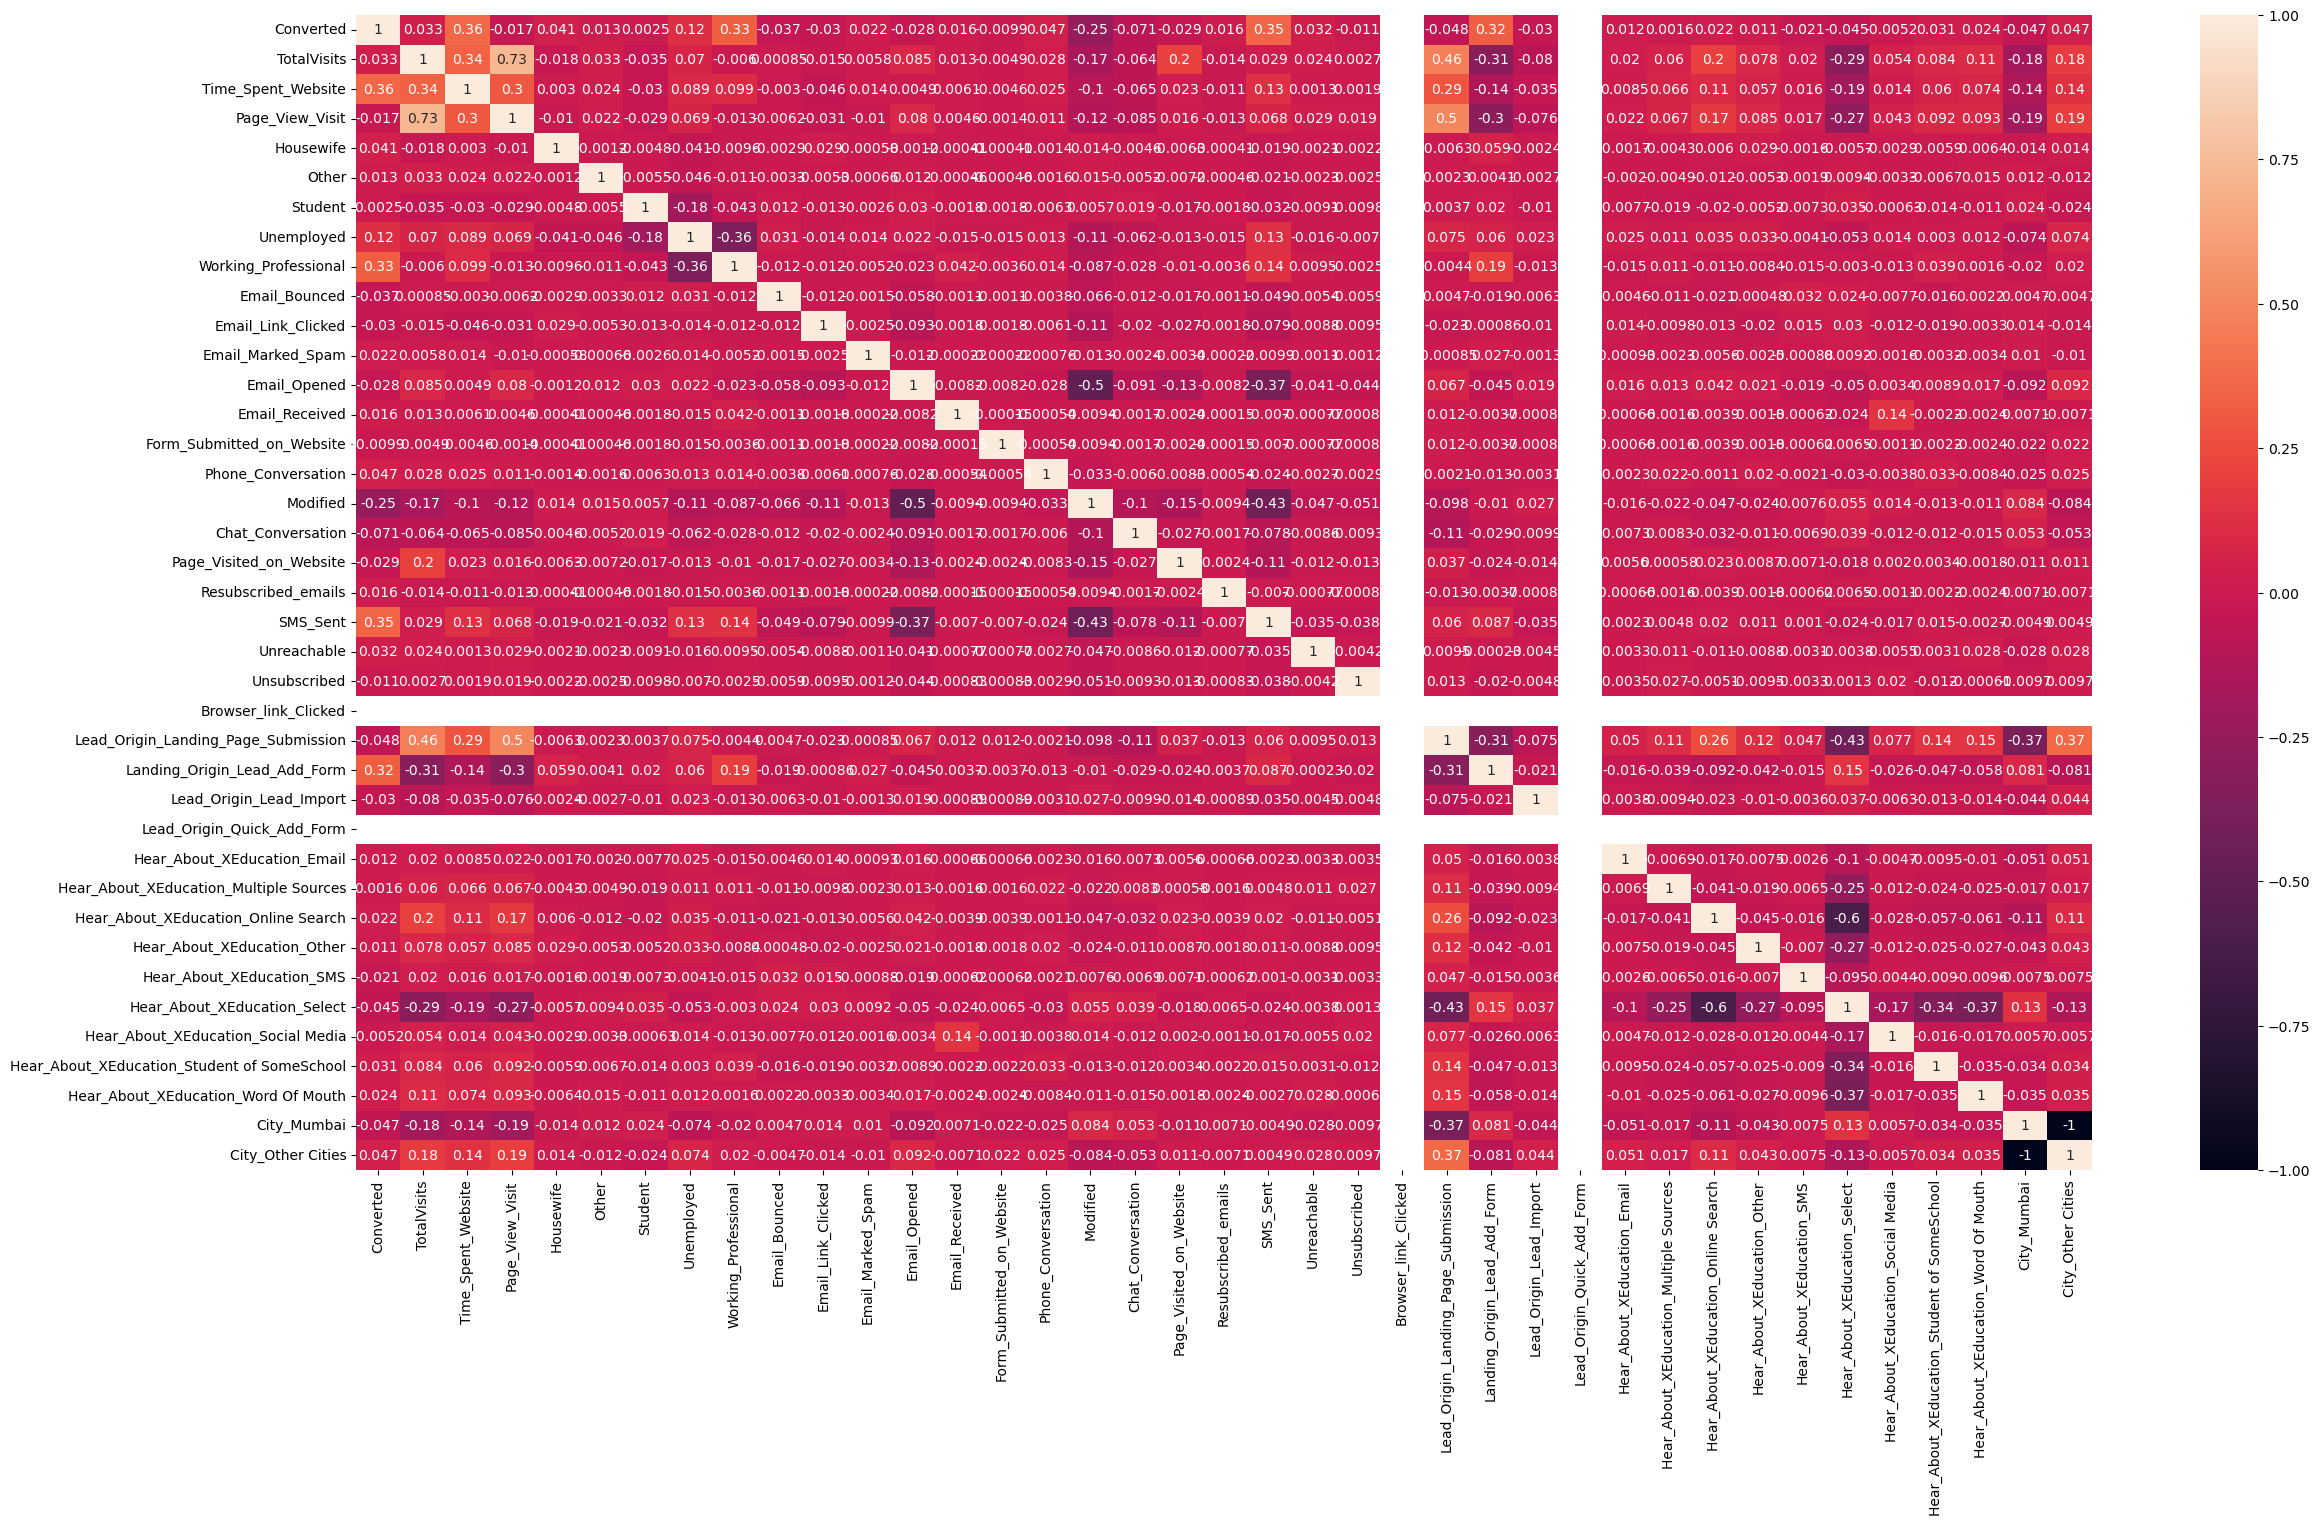

In [219]:
# Plot Heatmap of train dataset to understand the correlation between variables

fig, ax = plt.subplots(figsize=(28, 15))
corr = lead_train.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               annot=True)
plt.show()

In [220]:
# Creating X and y data dataframe for train set
y_train = lead_train.pop('Converted')
X_train = lead_train

X_train.head()

,TotalVisits,Time_Spent_Website,Page_View_Visit,Housewife,Other,Student,Unemployed,Working_Professional,Email_Bounced,Email_Link_Clicked,...,Hear_About_XEducation_Multiple Sources,Hear_About_XEducation_Online Search,Hear_About_XEducation_Other,Hear_About_XEducation_SMS,Hear_About_XEducation_Select,Hear_About_XEducation_Social Media,Hear_About_XEducation_Student of SomeSchool,Hear_About_XEducation_Word Of Mouth,City_Mumbai,City_Other Cities
5421,3,1410,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6335,10,1634,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6809,6,137,6,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7595,2,1090,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7917,2,1326,2,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [221]:
# Creating X and y data dataframe for test set
y_test = lead_test.pop('Converted')
X_test = lead_test

X_test.head()

,TotalVisits,Time_Spent_Website,Page_View_Visit,Housewife,Other,Student,Unemployed,Working_Professional,Email_Bounced,Email_Link_Clicked,...,Hear_About_XEducation_Multiple Sources,Hear_About_XEducation_Online Search,Hear_About_XEducation_Other,Hear_About_XEducation_SMS,Hear_About_XEducation_Select,Hear_About_XEducation_Social Media,Hear_About_XEducation_Student of SomeSchool,Hear_About_XEducation_Word Of Mouth,City_Mumbai,City_Other Cities
648,10,333,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6077,2,1305,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1877,10,1039,5,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
658,10,1452,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6359,7,160,7,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Time_Spent_Website','Page_View_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Time_Spent_Website','Page_View_Visit']])


## 4.Data Modeling and Evaluation

In [223]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [224]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6467 entries, 5421 to 5641
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   TotalVisits                                  6467 non-null   float64
 1   Time_Spent_Website                           6467 non-null   float64
 2   Page_View_Visit                              6467 non-null   float64
 3   Housewife                                    6467 non-null   int64  
 4   Other                                        6467 non-null   int64  
 5   Student                                      6467 non-null   int64  
 6   Unemployed                                   6467 non-null   int64  
 7   Working_Professional                         6467 non-null   int64  
 8   Email_Bounced                                6467 non-null   int64  
 9   Email_Link_Clicked                           6467 non-null   int64  
 1

In [225]:
X_train.head()

,TotalVisits,Time_Spent_Website,Page_View_Visit,Housewife,Other,Student,Unemployed,Working_Professional,Email_Bounced,Email_Link_Clicked,...,Hear_About_XEducation_Multiple Sources,Hear_About_XEducation_Online Search,Hear_About_XEducation_Other,Hear_About_XEducation_SMS,Hear_About_XEducation_Select,Hear_About_XEducation_Social Media,Hear_About_XEducation_Student of SomeSchool,Hear_About_XEducation_Word Of Mouth,City_Mumbai,City_Other Cities
5421,-0.034564,1.672208,0.366456,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6335,2.497305,2.079394,1.320125,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6809,1.050522,-0.641844,1.796959,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7595,-0.396260,1.090514,-0.587214,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7917,-0.396260,1.519514,-0.110379,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [226]:
def addConstant(X_train_sm):
#Add constant
    X_train_sm = sm.add_constant(X_train_sm)
    return X_train_sm

In [227]:
# create function linear model

def create_linearmodel(X_train_sm):
    # create  model

    lr = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    return lr


In [228]:
# Function to calculate VIF
# calculate VIF
def calculateVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [229]:
X_train_sm= X_train['Time_Spent_Website']
lr_model = create_linearmodel(X_train_sm)
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6466
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4059.6
Date:                Mon, 19 Jun 2023   Deviance:                       8119.3
Time:                        13:09:37   Pearson chi2:                 6.64e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07756
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Time_Spent_Website     0.7868      0.029     26.888      0.000       0.729       0.844
======================================================================================
"""

Feature Selection using RFE

In [230]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [231]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [232]:
rfe.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False])

In [233]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Time_Spent_Website', True, 1),
 ('Page_View_Visit', False, 5),
 ('Housewife', True, 1),
 ('Other', True, 1),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working_Professional', True, 1),
 ('Email_Bounced', True, 1),
 ('Email_Link_Clicked', False, 7),
 ('Email_Marked_Spam', False, 2),
 ('Email_Opened', False, 8),
 ('Email_Received', False, 14),
 ('Form_Submitted_on_Website', False, 12),
 ('Phone_Conversation', True, 1),
 ('Modified', True, 1),
 ('Chat_Conversation', True, 1),
 ('Page_Visited_on_Website', False, 4),
 ('Resubscribed_emails', True, 1),
 ('SMS_Sent', True, 1),
 ('Unreachable', True, 1),
 ('Unsubscribed', False, 11),
 ('Browser_link_Clicked', False, 18),
 ('Lead_Origin_Landing_Page_Submission', True, 1),
 ('Landing_Origin_Lead_Add_Form', True, 1),
 ('Lead_Origin_Lead_Import', True, 1),
 ('Lead_Origin_Quick_Add_Form', False, 19),
 ('Hear_About_XEducation_Email', True, 1),
 ('Hear_About_XEducation_Multiple Sources', True, 1),
 ('Hear_About

In [234]:
col = X_train.columns[rfe.support_]

In [235]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page_View_Visit', 'Email_Link_Clicked',
       'Email_Marked_Spam', 'Email_Opened', 'Email_Received',
       'Form_Submitted_on_Website', 'Page_Visited_on_Website', 'Unsubscribed',
       'Browser_link_Clicked', 'Lead_Origin_Quick_Add_Form',
       'Hear_About_XEducation_Online Search', 'Hear_About_XEducation_Other',
       'Hear_About_XEducation_Social Media',
       'Hear_About_XEducation_Student of SomeSchool',
       'Hear_About_XEducation_Word Of Mouth', 'City_Mumbai',
       'City_Other Cities'],
      dtype='object')

In [236]:
col

Index(['Time_Spent_Website', 'Housewife', 'Other', 'Student', 'Unemployed',
       'Working_Professional', 'Email_Bounced', 'Phone_Conversation',
       'Modified', 'Chat_Conversation', 'Resubscribed_emails', 'SMS_Sent',
       'Unreachable', 'Lead_Origin_Landing_Page_Submission',
       'Landing_Origin_Lead_Add_Form', 'Lead_Origin_Lead_Import',
       'Hear_About_XEducation_Email', 'Hear_About_XEducation_Multiple Sources',
       'Hear_About_XEducation_SMS', 'Hear_About_XEducation_Select'],
      dtype='object')

In [237]:
X_train_sm = X_train[col]
X_train_sm=addConstant(X_train_sm)
lr_model = create_linearmodel(X_train_sm)
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.5
Date:                Mon, 19 Jun 2023   Deviance:                       5385.0
Time:                        13:09:39   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0168      0.126     -8.050      0.000      -1.264      -0.769
Time_Spent_Website                         0.9970      0.037     27.011      0.000       0.925       1.069
Housewife                                 23.4529   1.56e+04      0.002      0.999   -3.05e+04    3.05e+04
Other                                      1.5267      0.778      1.962      0.050       0.002       3.052
Student                                    1.3526      0.235      5.759      0.000       0.892       1.813
Unemployed                                 1.0517      0.086     12.203      0.000       0.883       1.221
Working_Professional                       3.7125      0.203     18.293      0.000       3.315       4.110
Email_Bounced                             -1.0397      0.414     -2.510      0.012      -1.852      -0.228
Phone_Conversation                         3.2259      1.115      2.894      0.004       1.041       5.410
Modified                                  -0.7215      0.084     -8.613      0.000      -0.886      -0.557
Chat_Conversation                         -0.9296      0.331     -2.808      0.005      -1.578      -0.281
Resubscribed_emails                       24.9042   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS_Sent                                   1.2598      0.085     14.867      0.000       1.094       1.426
Unreachable                                1.6107      0.503      3.205      0.001       0.626       2.596
Lead_Origin_Landing_Page_Submission       -0.8094      0.082     -9.860      0.000      -0.970      -0.649
Landing_Origin_Lead_Add_Form               3.1473      0.182     17.260      0.000       2.790       3.505
Lead_Origin_Lead_Import                   -0.3913      0.505     -0.774      0.439      -1.382       0.599
Hear_About_XEducation_Email                0.7862      0.570      1.380      0.168      -0.331       1.903
Hear_About_XEducation_Multiple Sources    -0.5863      0.261     -2.244      0.025      -1.098      -0.074
Hear_About_XEducation_SMS                 -1.1546      0.778     -1.483      0.138      -2.680       0.371
Hear_About_XEducation_Select              -0.4332      0.091     -4.785      0.000      -0.611      -0.256
==========================================================================================================
"""

In [238]:
vif1 = calculateVIF(X_train[col])

In [239]:
vif1

,Features,VIF
19,Hear_About_XEducation_Select,2.992609
4,Unemployed,2.832836
13,Lead_Origin_Landing_Page_Submission,2.077003
8,Modified,1.769629
11,SMS_Sent,1.654039
5,Working_Professional,1.374588
14,Landing_Origin_Lead_Add_Form,1.334765
0,Time_Spent_Website,1.140970
3,Student,1.068958
17,Hear_About_XEducation_Multiple Sources,1.056336


In [240]:
X_train_sm = X_train[col]
X_train_sm=addConstant(X_train_sm)
lr_model = create_linearmodel(X_train_sm)
res = lr_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.5
Date:                Mon, 19 Jun 2023   Deviance:                       5385.0
Time:                        13:09:39   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0168      0.126     -8.050      0.000      -1.264      -0.769
Time_Spent_Website                         0.9970      0.037     27.011      0.000       0.925       1.069
Housewife                                 23.4529   1.56e+04      0.002      0.999   -3.05e+04    3.05e+04
Other                                      1.5267      0.778      1.962      0.050       0.002       3.052
Student                                    1.3526      0.235      5.759      0.000       0.892       1.813
Unemployed                                 1.0517      0.086     12.203      0.000       0.883       1.221
Working_Professional                       3.7125      0.203     18.293      0.000       3.315       4.110
Email_Bounced                             -1.0397      0.414     -2.510      0.012      -1.852      -0.228
Phone_Conversation                         3.2259      1.115      2.894      0.004       1.041       5.410
Modified                                  -0.7215      0.084     -8.613      0.000      -0.886      -0.557
Chat_Conversation                         -0.9296      0.331     -2.808      0.005      -1.578      -0.281
Resubscribed_emails                       24.9042   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS_Sent                                   1.2598      0.085     14.867      0.000       1.094       1.426
Unreachable                                1.6107      0.503      3.205      0.001       0.626       2.596
Lead_Origin_Landing_Page_Submission       -0.8094      0.082     -9.860      0.000      -0.970      -0.649
Landing_Origin_Lead_Add_Form               3.1473      0.182     17.260      0.000       2.790       3.505
Lead_Origin_Lead_Import                   -0.3913      0.505     -0.774      0.439      -1.382       0.599
Hear_About_XEducation_Email                0.7862      0.570      1.380      0.168      -0.331       1.903
Hear_About_XEducation_Multiple Sources    -0.5863      0.261     -2.244      0.025      -1.098      -0.074
Hear_About_XEducation_SMS                 -1.1546      0.778     -1.483      0.138      -2.680       0.371
Hear_About_XEducation_Select              -0.4332      0.091     -4.785      0.000      -0.611      -0.256
==========================================================================================================
"""

In [241]:
vif2 = calculateVIF(X_train[col])

In [242]:
vif2

,Features,VIF
19,Hear_About_XEducation_Select,2.992609
4,Unemployed,2.832836
13,Lead_Origin_Landing_Page_Submission,2.077003
8,Modified,1.769629
11,SMS_Sent,1.654039
5,Working_Professional,1.374588
14,Landing_Origin_Lead_Add_Form,1.334765
0,Time_Spent_Website,1.140970
3,Student,1.068958
17,Hear_About_XEducation_Multiple Sources,1.056336


In [243]:
# Get predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5421    0.460316
6335    0.640417
6809    0.071163
7595    0.410292
7917    0.576223
3297    0.125456
8070    0.996925
987     0.170429
7422    0.364469
1032    0.890188
dtype: float64

In [244]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
5421,0,0.460316,5421
6335,0,0.640417,6335
6809,0,0.071163,6809
7595,1,0.410292,7595
7917,0,0.576223,7917


In [245]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's print the head
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted
5421,0,0.460316,5421,0
6335,0,0.640417,6335,1
6809,0,0.071163,6809,0
7595,1,0.410292,7595,0
7917,0,0.576223,7917,1


In [246]:
from sklearn import metrics

**Draw ROC Curve**

In [247]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [248]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

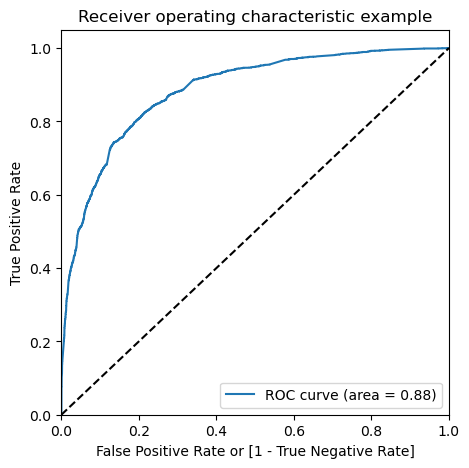

In [249]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**Finding Optimal Cutoff Point**

In [250]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5421,0,0.460316,5421,0,1,1,1,1,1,0,0,0,0,0
6335,0,0.640417,6335,1,1,1,1,1,1,1,1,0,0,0
6809,0,0.071163,6809,0,1,0,0,0,0,0,0,0,0,0
7595,1,0.410292,7595,0,1,1,1,1,1,0,0,0,0,0
7917,0,0.576223,7917,1,1,1,1,1,1,1,0,0,0,0


In [251]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388588  1.000000  0.000000
0.1   0.1  0.610175  0.973339  0.379363
0.2   0.2  0.749807  0.917628  0.643146
0.3   0.3  0.793722  0.842419  0.762772
0.4   0.4  0.807639  0.779546  0.825493
0.5   0.5  0.806247  0.678870  0.887203
0.6   0.6  0.797278  0.601273  0.921851
0.7   0.7  0.781197  0.520493  0.946889
0.8   0.8  0.757074  0.424194  0.968639
0.9   0.9  0.713314  0.280541  0.988366


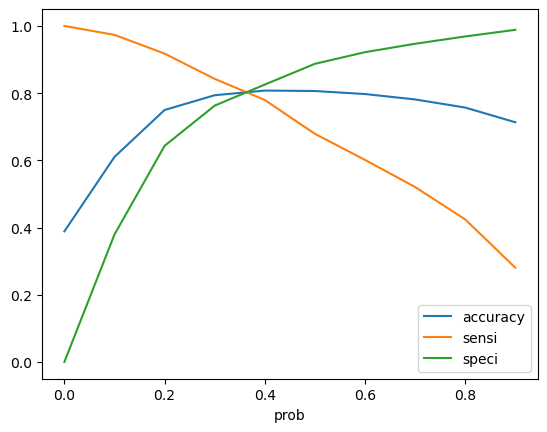

In [252]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.4 is the optimum point to take it as a cutoff probability.**

In [253]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5421,0,0.460316,5421,0,1,1,1,1,1,0,0,0,0,0,1
6335,0,0.640417,6335,1,1,1,1,1,1,1,1,0,0,0,1
6809,0,0.071163,6809,0,1,0,0,0,0,0,0,0,0,0,0
7595,1,0.410292,7595,0,1,1,1,1,1,0,0,0,0,0,1
7917,0,0.576223,7917,1,1,1,1,1,1,1,0,0,0,0,1
3297,0,0.125456,3297,0,1,1,0,0,0,0,0,0,0,0,0
8070,1,0.996925,8070,1,1,1,1,1,1,1,1,1,1,1,1
987,0,0.170429,987,0,1,1,0,0,0,0,0,0,0,0,0
7422,0,0.364469,7422,0,1,1,1,1,0,0,0,0,0,0,0
1032,1,0.890188,1032,1,1,1,1,1,1,1,1,1,1,0,1


In [254]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3508  446]
 [ 807 1706]]


In [255]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8062471006649142


In [256]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [257]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.6788698766414644

In [258]:
# Calculate specificity
TN / float(TN+FP)

0.887202832574608

In [259]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.112797167425392


In [260]:
# positive predictive value
print (TP / float(TP+FP))

0.7927509293680297


In [261]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8129779837775203


Precision and Recall

#Looking at the confusion matrix again

In [262]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3508,  446],
       [ 807, 1706]], dtype=int64)

Precision
TP / TP + FP

In [263]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7927509293680297

##### Recall
TP / TP + FN

In [264]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6788698766414644

Using sklearn utilities for the same

In [265]:
from sklearn.metrics import precision_score, recall_score

In [266]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7927509293680297

In [267]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6788698766414644

### Precision and recall tradeoff

In [268]:
from sklearn.metrics import precision_recall_curve

In [269]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

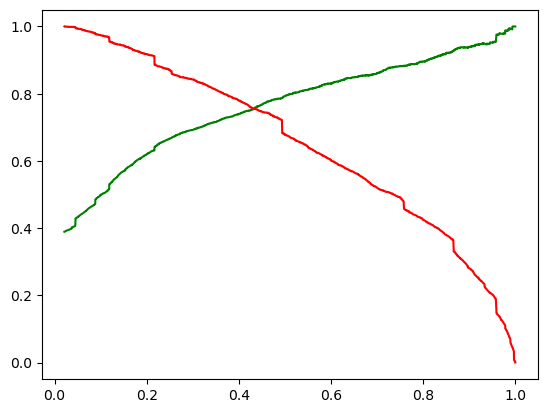

In [270]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [271]:
X_test.head()

,TotalVisits,Time_Spent_Website,Page_View_Visit,Housewife,Other,Student,Unemployed,Working_Professional,Email_Bounced,Email_Link_Clicked,...,Hear_About_XEducation_Multiple Sources,Hear_About_XEducation_Online Search,Hear_About_XEducation_Other,Hear_About_XEducation_SMS,Hear_About_XEducation_Select,Hear_About_XEducation_Social Media,Hear_About_XEducation_Student of SomeSchool,Hear_About_XEducation_Word Of Mouth,City_Mumbai,City_Other Cities
648,10,333,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6077,2,1305,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1877,10,1039,5,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
658,10,1452,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6359,7,160,7,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [272]:
X_test.columns

Index(['TotalVisits', 'Time_Spent_Website', 'Page_View_Visit', 'Housewife',
       'Other', 'Student', 'Unemployed', 'Working_Professional',
       'Email_Bounced', 'Email_Link_Clicked', 'Email_Marked_Spam',
       'Email_Opened', 'Email_Received', 'Form_Submitted_on_Website',
       'Phone_Conversation', 'Modified', 'Chat_Conversation',
       'Page_Visited_on_Website', 'Resubscribed_emails', 'SMS_Sent',
       'Unreachable', 'Unsubscribed', 'Browser_link_Clicked',
       'Lead_Origin_Landing_Page_Submission', 'Landing_Origin_Lead_Add_Form',
       'Lead_Origin_Lead_Import', 'Lead_Origin_Quick_Add_Form',
       'Hear_About_XEducation_Email', 'Hear_About_XEducation_Multiple Sources',
       'Hear_About_XEducation_Online Search', 'Hear_About_XEducation_Other',
       'Hear_About_XEducation_SMS', 'Hear_About_XEducation_Select',
       'Hear_About_XEducation_Social Media',
       'Hear_About_XEducation_Student of SomeSchool',
       'Hear_About_XEducation_Word Of Mouth', 'City_Mumbai',
  

### Step 11: Making predictions on the test set

In [273]:
X_test[['TotalVisits','Time_Spent_Website','Page_View_Visit']] = scaler.transform(X_test[['TotalVisits','Time_Spent_Website','Page_View_Visit']])
X_test = X_test[col]
X_test.head()

,Time_Spent_Website,Housewife,Other,Student,Unemployed,Working_Professional,Email_Bounced,Phone_Conversation,Modified,Chat_Conversation,Resubscribed_emails,SMS_Sent,Unreachable,Lead_Origin_Landing_Page_Submission,Landing_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Hear_About_XEducation_Email,Hear_About_XEducation_Multiple Sources,Hear_About_XEducation_SMS,Hear_About_XEducation_Select
648,-0.285556,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6077,1.481340,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1877,0.997807,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
658,1.748556,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6359,-0.600035,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [274]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [275]:
y_test_pred = res.predict(X_test_sm)

In [276]:
y_test_pred[:10]

648     0.055601
6077    0.313777
1877    0.446991
658     0.479273
6359    0.366784
6250    0.044805
3803    0.448614
2061    0.854604
6143    0.153547
7001    0.088013
dtype: float64

In [277]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [278]:
# Let's see the head
y_pred_1.head()

,0
648,0.055601
6077,0.313777
1877,0.446991
658,0.479273
6359,0.366784


In [279]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [280]:
# Putting CustID to index
y_test_df['Lead_Number'] = y_test_df.index

In [281]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [282]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [283]:
y_pred_final.head()

,Converted,Lead_Number,0
0,0,648,0.055601
1,0,6077,0.313777
2,1,1877,0.446991
3,0,658,0.479273
4,0,6359,0.366784


In [284]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [285]:
y_pred_final.head()

,Converted,Lead_Number,Converted_Prob
0,0,648,0.055601
1,0,6077,0.313777
2,1,1877,0.446991
3,0,658,0.479273
4,0,6359,0.366784


In [286]:
y_pred_final.columns

Index(['Converted', 'Lead_Number', 'Converted_Prob'], dtype='object')

In [287]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [288]:
y_pred_final.head(10)

,Converted,Lead_Number,Converted_Prob,final_predicted
0,0,648,0.055601,0
1,0,6077,0.313777,0
2,1,1877,0.446991,1
3,0,658,0.479273,1
4,0,6359,0.366784,0
5,0,6250,0.044805,0
6,1,3803,0.448614,1
7,1,2061,0.854604,1
8,0,6143,0.153547,0
9,0,7001,0.088013,0


In [289]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8145743145743146

In [290]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1451,  273],
       [ 241,  807]], dtype=int64)

In [291]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [292]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7700381679389313

In [293]:
# Let us calculate specificity
TN / float(TN+FP)

0.8416473317865429